In [1]:
# load librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from os.path import join
import seaborn as sns
import statsmodels.api as sm
import scipy
import json
import statsmodels.formula.api as smf

from functions import utils
from functions import plotting
from functions import io

# 1. Load subjects #

In [2]:
# Use the Included or excluded.xlsx document:
onedrive_path = utils._get_onedrive_path()

working_path = os.path.dirname(os.getcwd())
results_path = join(working_path, "results")
behav_results_saving_path = join(results_path, "behav_results")
# json_path = join(behav_results_saving_path, "JSON_test_23_june")
# if not os.path.isdir(behav_results_saving_path):
#     os.makedirs(behav_results_saving_path)

In [3]:
# read the json file containing the included and excluded subjects
# Open and read the JSON file
included_excluded_file = join(behav_results_saving_path, 'final_included_subjects.json')
with open(included_excluded_file, 'r') as file:
    included_subjects = json.load(file)


In [4]:
subject_colors = utils.create_color_palette(included_subjects)

['preop001', 'C003', 'C004', 'C006', 'sub006', 'sub011', 'sub015', 'sub019', 'sub023']


In [5]:
plotting.plot_color_palette(subject_colors, behav_results_saving_path)

In [6]:
data = io.load_behav_data(included_subjects, onedrive_path)

preop001 mSST
C003 mSST
C004 mSST
C006 mSST
sub006 DBS ON mSST
sub006 DBS OFF mSST
sub011 DBS OFF mSST
sub011 DBS ON mSST
sub015 DBS OFF mSST
sub015 DBS ON mSST
sub019 DBS ON mSST
sub019 DBS OFF mSST
sub023 DBS OFF mSST
sub023 DBS ON mSST


In [7]:
color_dict = {'DBS OFF': '#20a39e', 'DBS ON': '#ef5b5b', 'control': '#ffba49', 'preop': '#8E7DBE'}

In [8]:
session_dict = {
    'sub006 DBS ON': 1,
    'sub006 DBS OFF': 2,
    'sub011 DBS ON': 2,
    'sub011 DBS OFF': 1,
    'sub015 DBS ON': 2,
    'sub015 DBS OFF': 1,
    'sub019 DBS ON': 1,
    'sub019 DBS OFF': 2,
    'sub023 DBS ON': 2,
    'sub023 DBS OFF': 1,
}

In [9]:
bis_score_dict = {
    'sub006 DBS ON': 29,
    'sub006 DBS OFF': 29,
    'sub011 DBS ON': 36,
    'sub011 DBS OFF': 36,
    'sub015 DBS ON': 24,
    'sub015 DBS OFF': 24,
    'sub019 DBS ON': 27,
    'sub019 DBS OFF': 27,
    'sub023 DBS ON': 38,
    'sub023 DBS OFF': 38,
}

bdi_score_dict = {
    'sub006 DBS ON': 6,
    'sub006 DBS OFF': 6,
    'sub011 DBS ON': 27,
    'sub011 DBS OFF': 27,
    'sub015 DBS ON': 12,
    'sub015 DBS OFF': 12,
    'sub019 DBS ON': 10,
    'sub019 DBS OFF': 10,
    'sub023 DBS ON': 12,
    'sub023 DBS OFF': 12,
}

# 2. Extract main statistics and values for each subject and compile in a  dictionnary #

In [10]:
stats = utils.extract_stats(data)

In [11]:
# Initialize empty dictionaries
stats_OFF = {}
stats_ON = {}
stats_CONTROL = {}
stats_PREOP = {}

# Loop through the original dictionary and filter into sub-dictionaries
for key, value in stats.items():
    if "OFF" in key:
        stats_OFF[key] = value
    elif "ON" in key:
        stats_ON[key] = value
    elif "C" in key:
        stats_CONTROL[key] = value
    elif "preop" in key:
        stats_PREOP[key] = value

### 2.1. Plot reaction times in the same order as trials ##
(these could help see slowing during the task/block)

In [12]:
trial_color_dict = {'go_trial': "#4877D5",
                    'stop_trial': "#d3075c",
                    'go_continue_trial': "#FB9D05",
                    'go_fast_trial': "#28B628"}

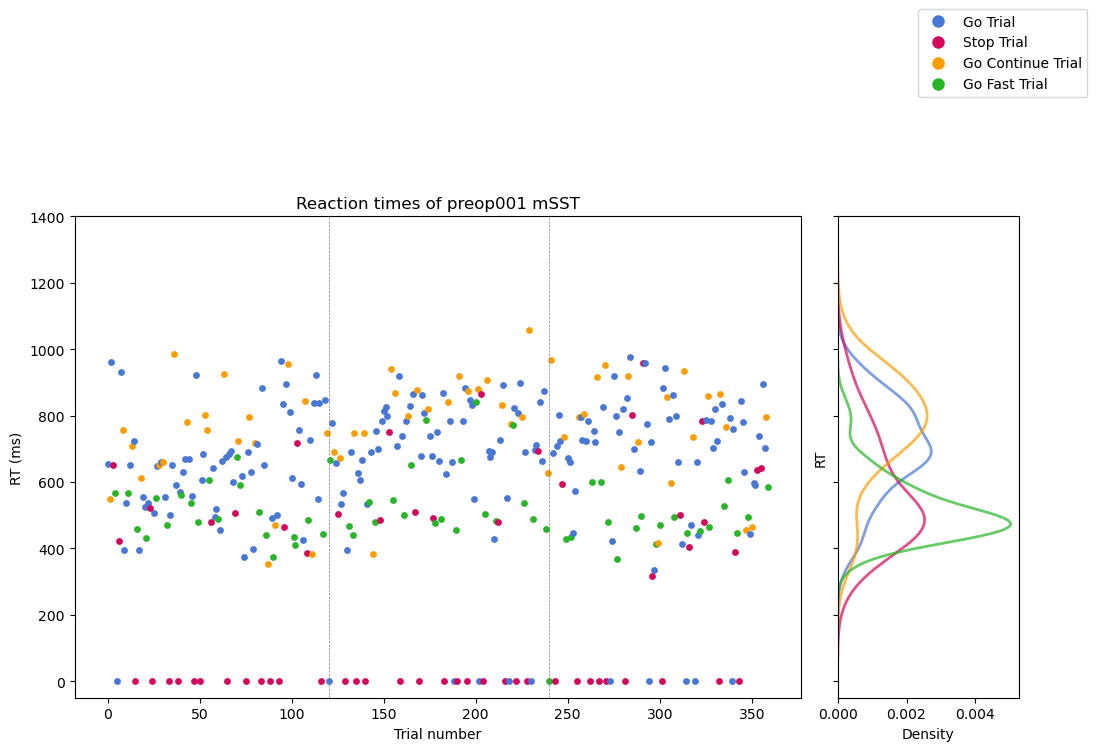

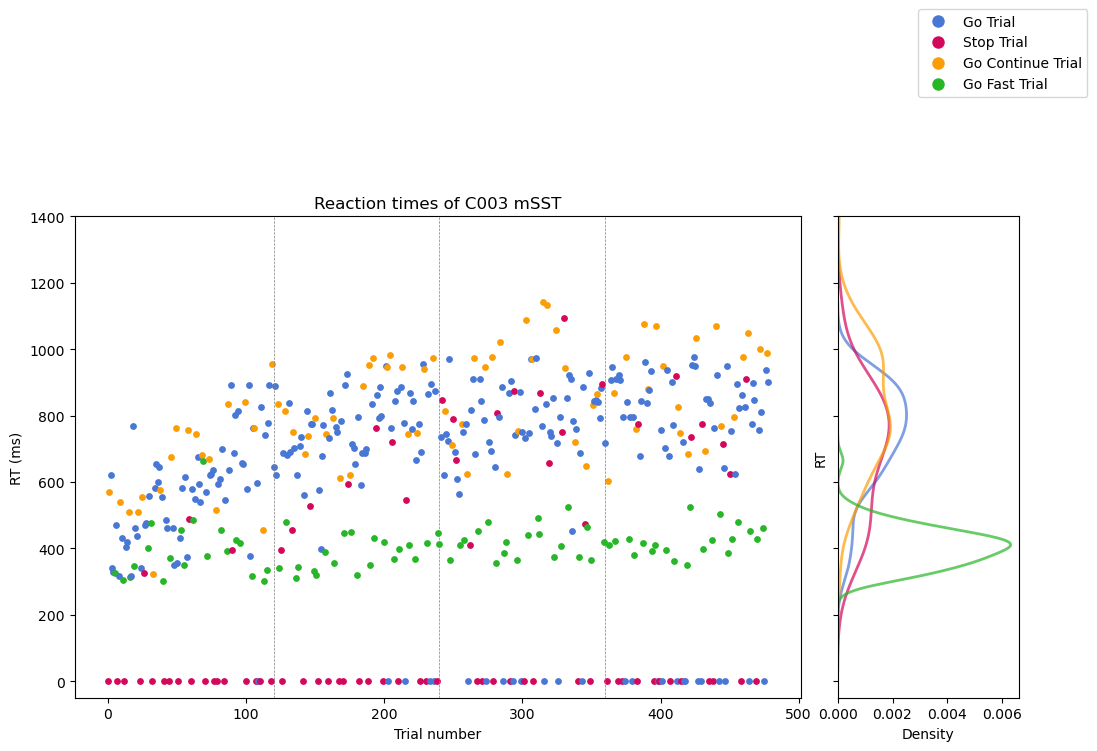

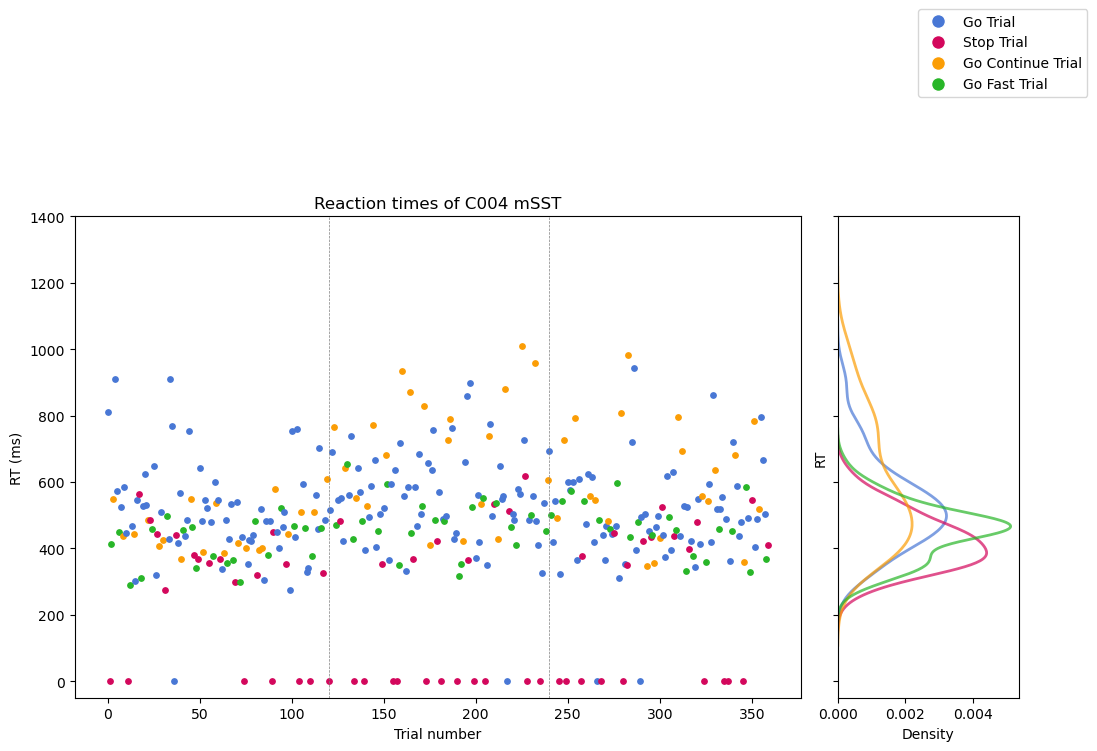

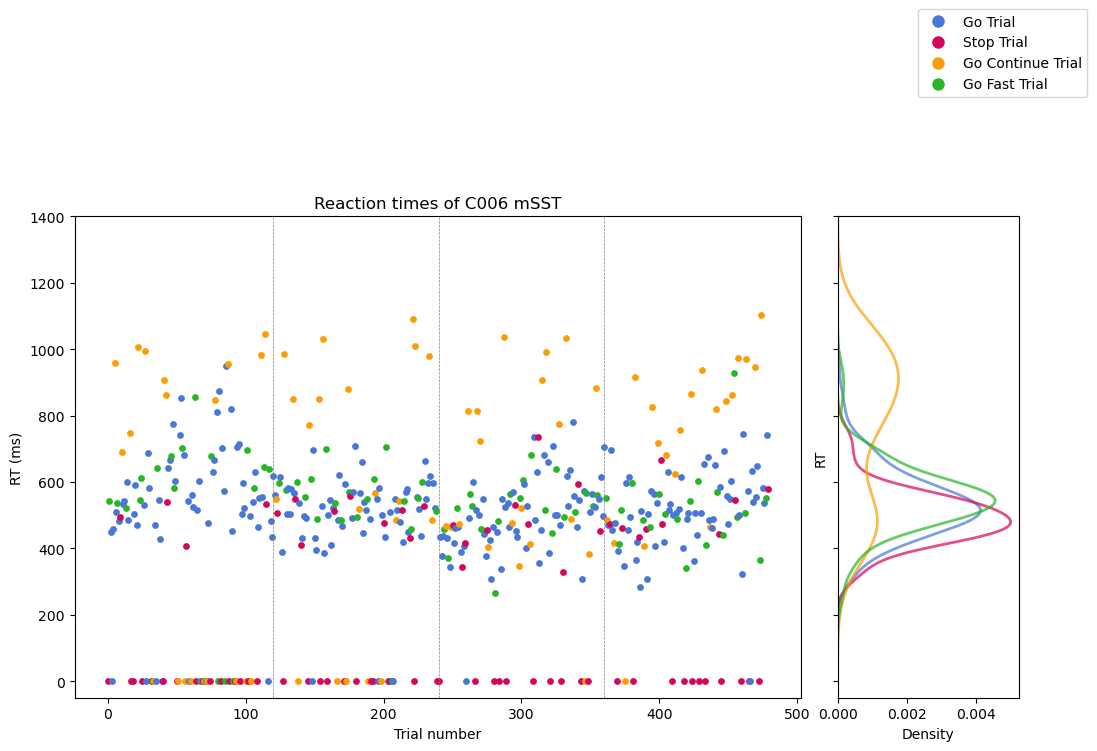

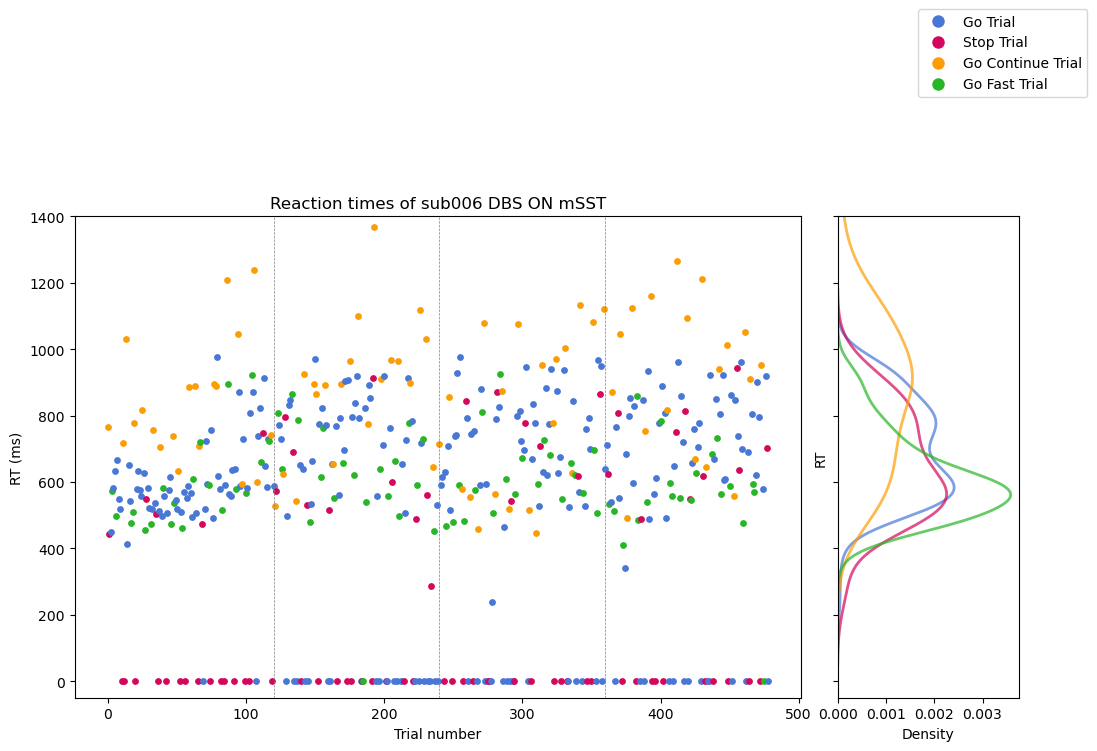

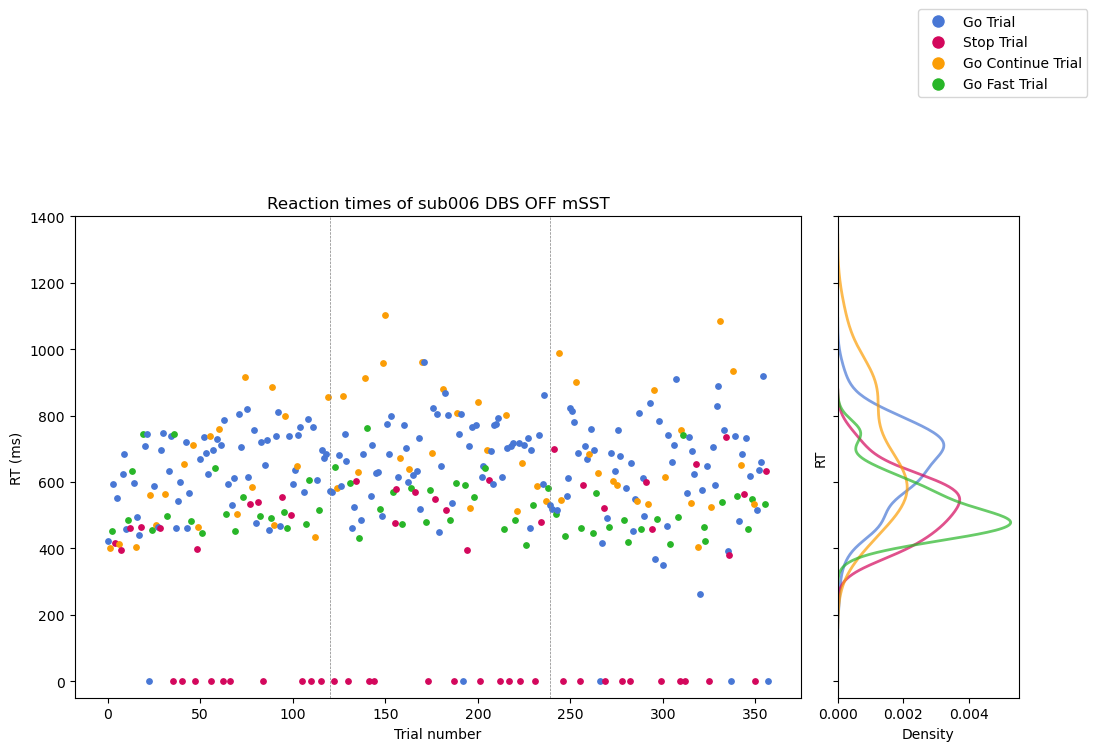

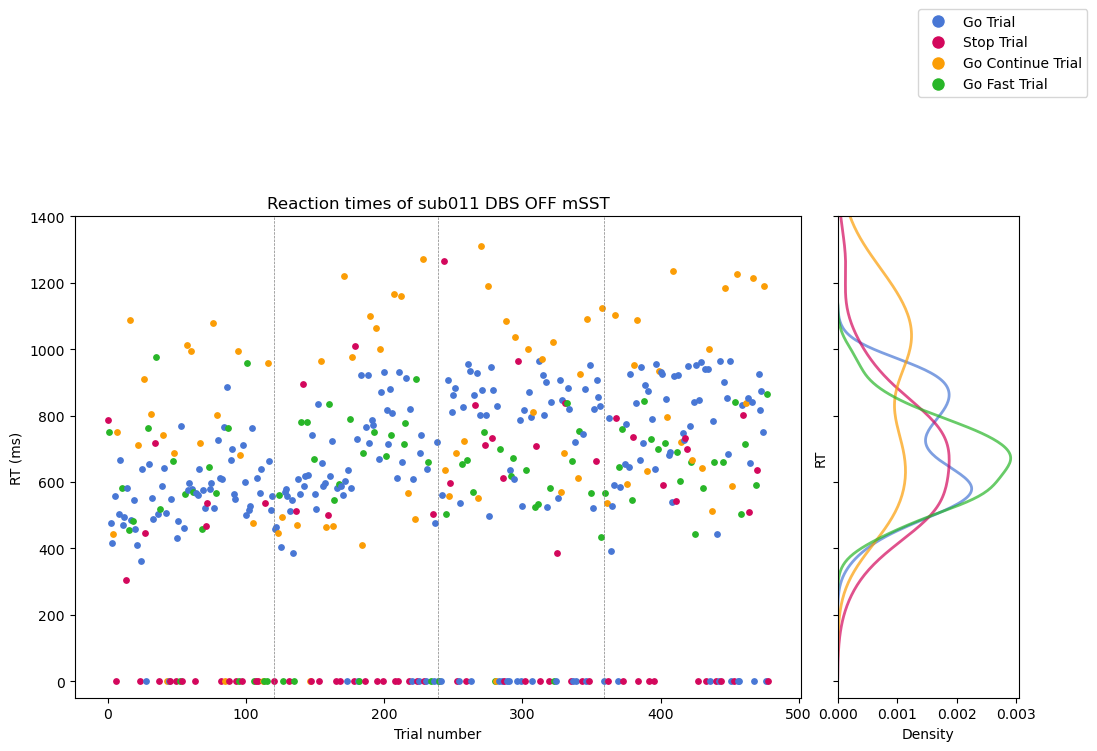

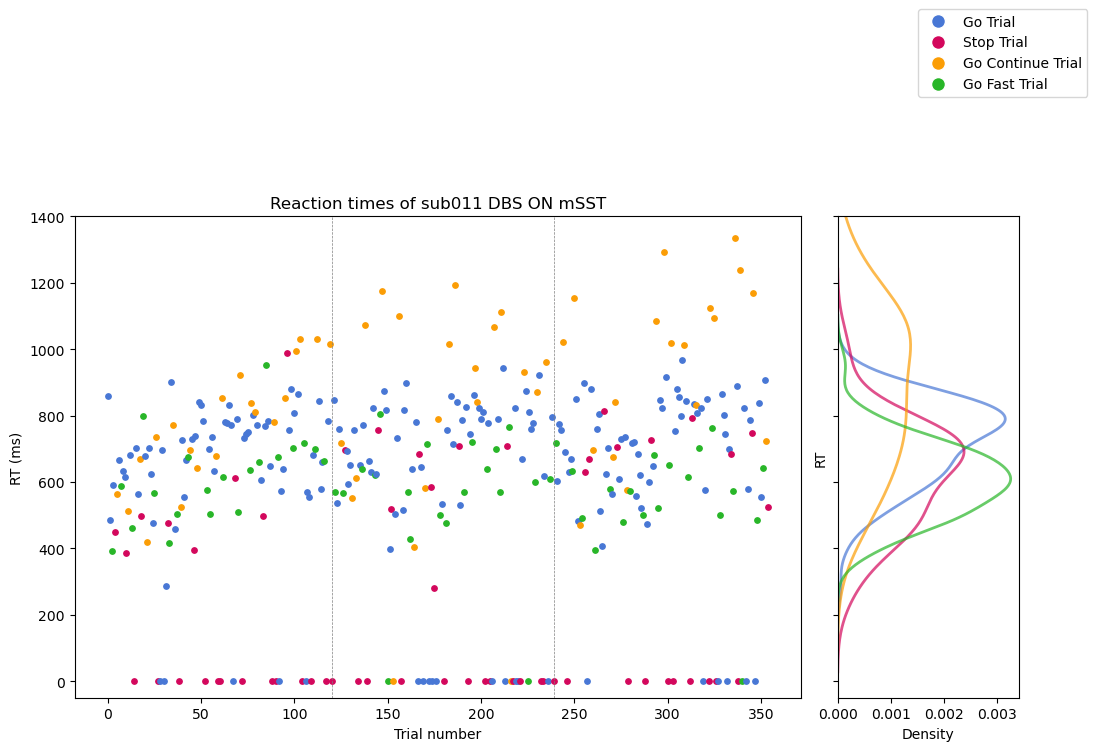

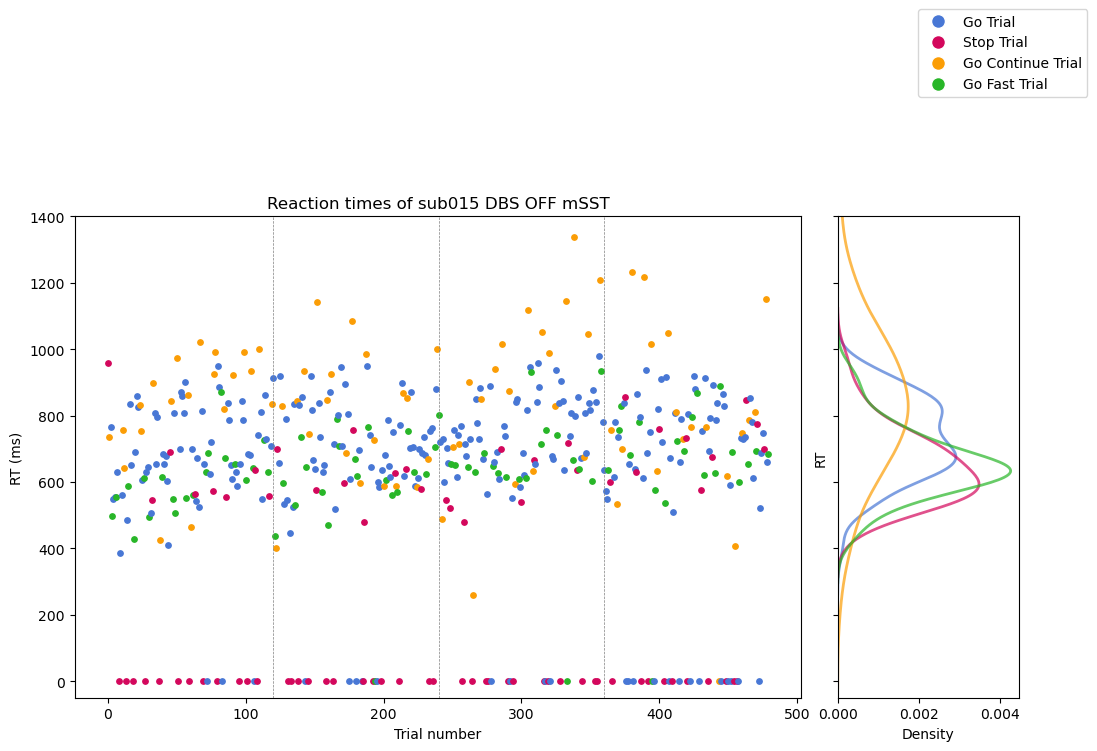

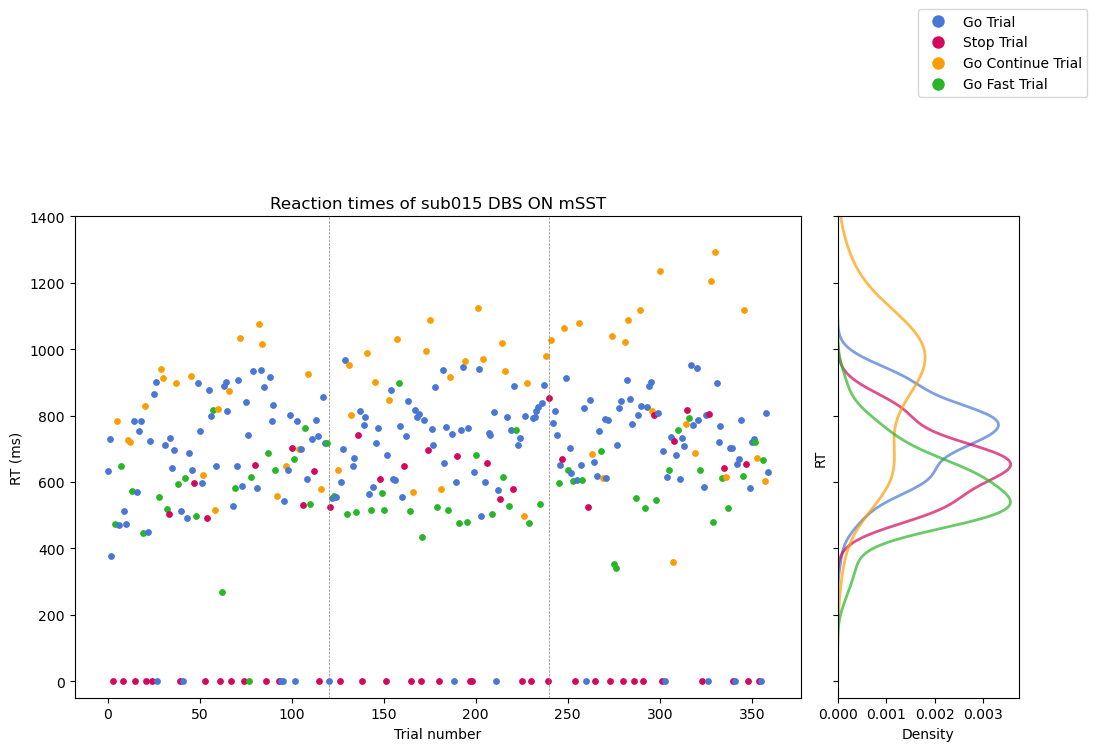

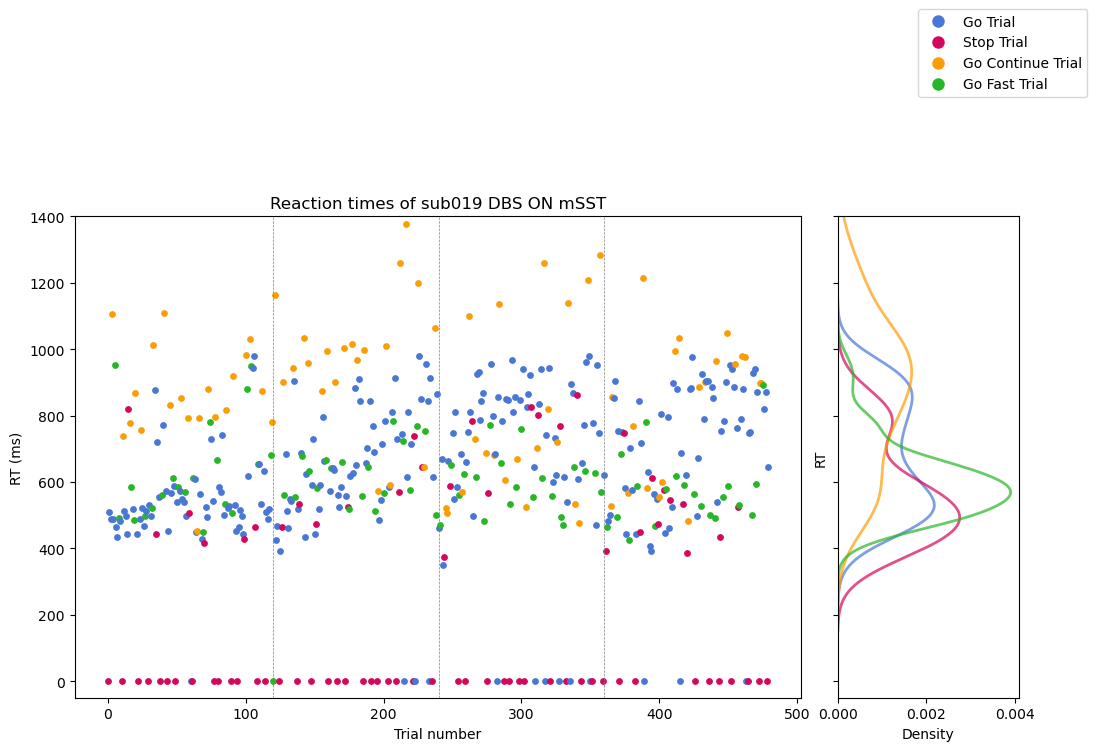

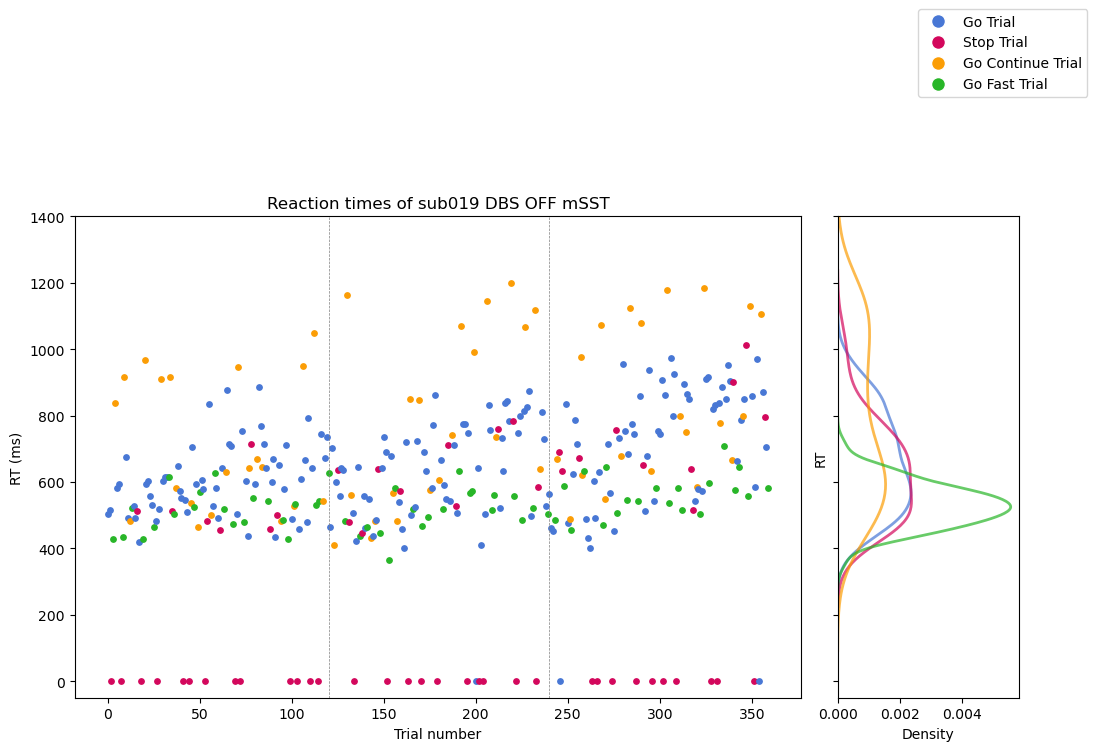

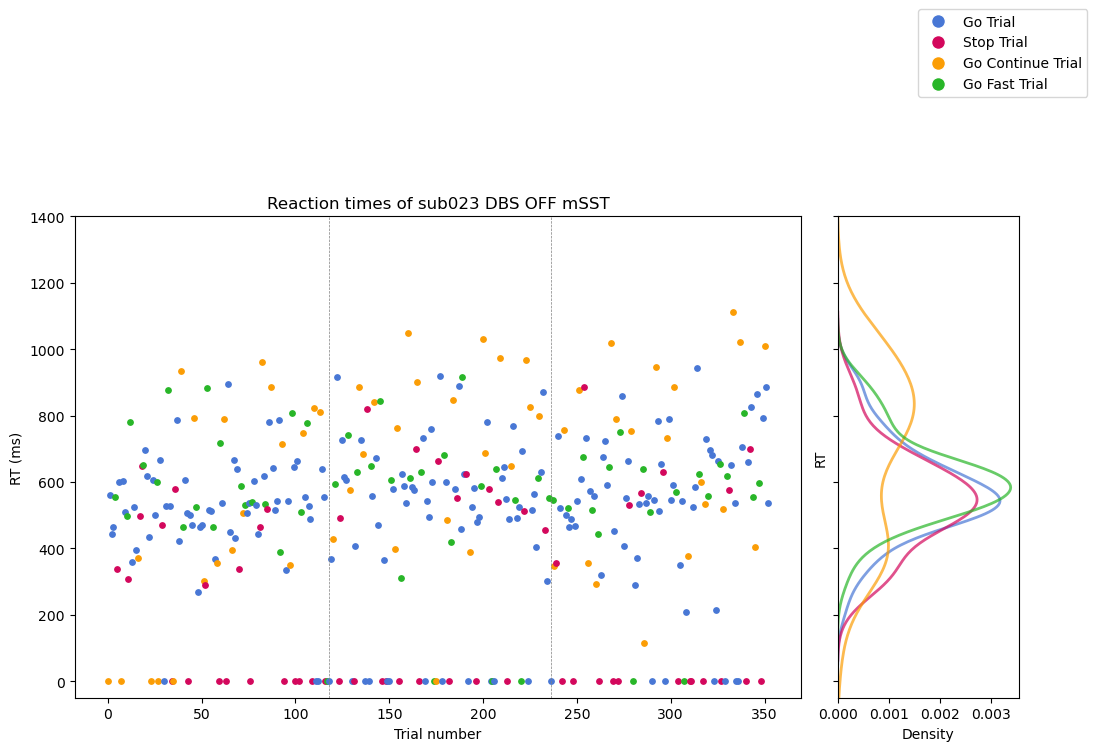

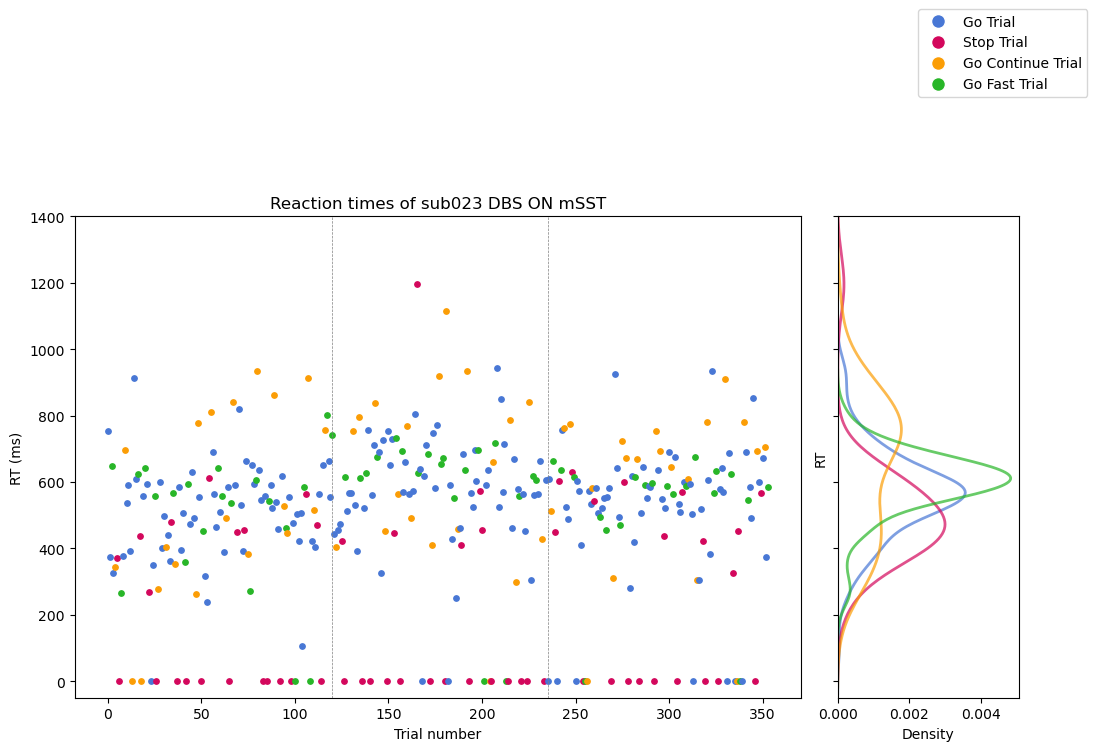

In [20]:
for sub in included_subjects:
    trial_IDs = stats[sub]['trial IDs']
    trial_RTs = stats[sub]['RTs (ms)']
    # replace nans with 0
    trial_RTs = [0 if np.isnan(rt) else rt for rt in trial_RTs]
    blocks = stats[sub]['block number']
    y = np.arange(len(trial_RTs))

    # Create figure with subplots for marginal distributions
    fig = plt.figure(figsize=(15, 10))
    
    # Create a grid layout
    gs = fig.add_gridspec(3, 3, width_ratios=[1, 4, 1], height_ratios=[1, 4, 1],
                         hspace=0.1, wspace=0.1)
    
    # Main scatter plot (center)
    ax_main = fig.add_subplot(gs[1, 1])
    
    # Distribution plots
    #ax_top = fig.add_subplot(gs[0, 1], sharex=ax_main)     # Top distribution (trial number)
    ax_right = fig.add_subplot(gs[1, 2], sharey=ax_main)   # Right distribution (RT)
    
    # Main scatter plot
    for i in range(len(trial_IDs)):
        ax_main.scatter(y[i], trial_RTs[i], c=trial_color_dict[trial_IDs[i]], s=15)
    
    ax_main.set_xlabel('Trial number')
    ax_main.set_ylabel('RT (ms)')
    ax_main.set_ylim(-50, 1400)
    ax_main.set_title(f'Reaction times of {sub}')
    
    # Add vertical lines for block changes
    block_change_indices = [i for i in range(1, len(blocks)) if blocks[i] != blocks[i-1]]
    for index in block_change_indices:
        ax_main.axvline(x=index, color='grey', linestyle='--', linewidth=0.5)
    
    # Top distribution - RT distribution by trial number (optional: density over time)
    trial_types = ['go_trial', 'stop_trial', 'go_continue_trial', 'go_fast_trial']
    
    # # Create stacked histogram on top showing trial type distribution over time
    # bins = np.linspace(0, len(trial_RTs), 20)
    # bottom = np.zeros(len(bins)-1)
    
    # for trial_type in trial_types:
    #     trial_indices = [i for i, t in enumerate(trial_IDs) if t == trial_type]
    #     hist, _ = np.histogram(trial_indices, bins=bins)
    #     ax_top.bar(bins[:-1], hist, width=bins[1]-bins[0], bottom=bottom, 
    #                color=trial_color_dict[trial_type], alpha=0.7, 
    #                label=trial_type.replace('_', ' ').title())
    #     bottom += hist
    
    # ax_top.set_ylabel('Trial Count')
    # ax_top.tick_params(labelbottom=False)
    
    # Right distribution - RT distribution for each trial type
    for i, trial_type in enumerate(trial_types):
        trial_rts = [trial_RTs[j] for j in range(len(trial_IDs)) 
                    if trial_IDs[j] == trial_type and trial_RTs[j] > 0]
        
        if len(trial_rts) > 0:
            # Create smooth distribution curve using seaborn's kdeplot
            import seaborn as sns
            
            # Create a temporary dataframe for seaborn
            temp_df = pd.DataFrame({'RT': trial_rts})
            
            # Plot horizontal KDE (kernel density estimation)
            sns.kdeplot(data=temp_df, y='RT', ax=ax_right, 
                    color=trial_color_dict[trial_type], 
                    alpha=0.7, linewidth=2,
                    label=trial_type.replace('_', ' ').title())

    ax_right.set_xlabel('Density')
    ax_right.tick_params(labelleft=False)
    #ax_right.legend(loc='upper right')
    
    # Create legend
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                                label=trial_type.replace('_', ' ').title(), 
                                markerfacecolor=trial_color_dict[trial_type], 
                                markersize=10) for trial_type in trial_types]
    
    fig.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(0.95, 0.95))
    
    plt.show()

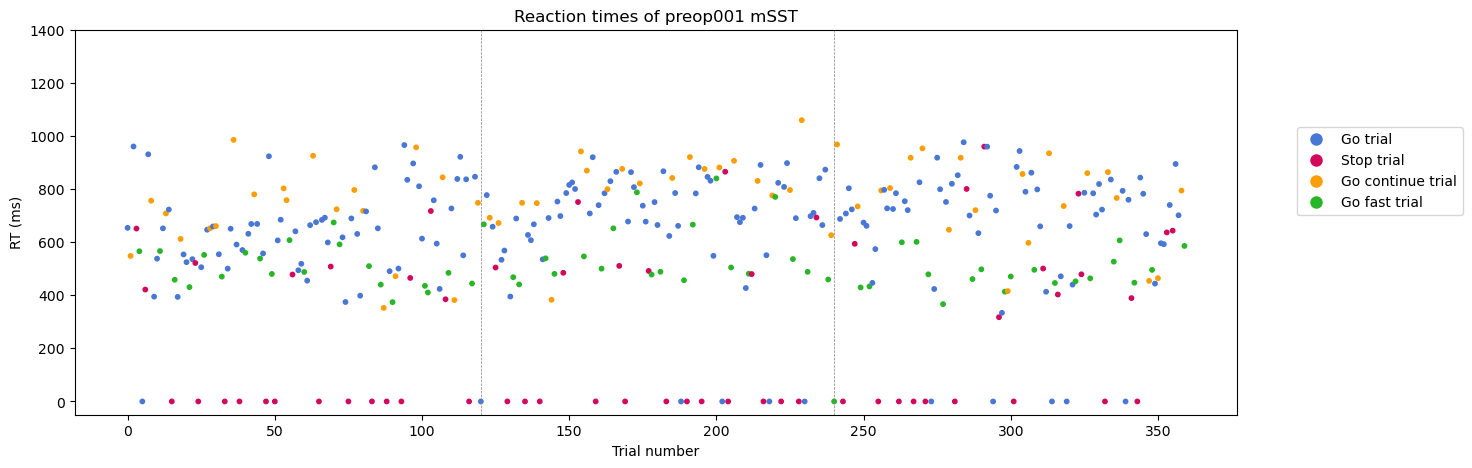

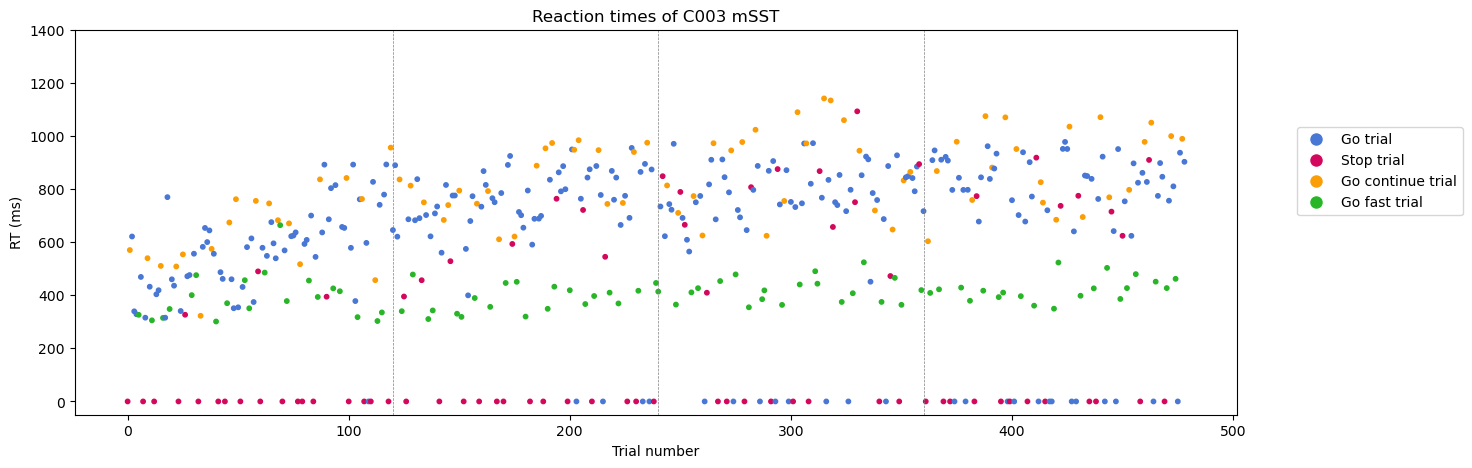

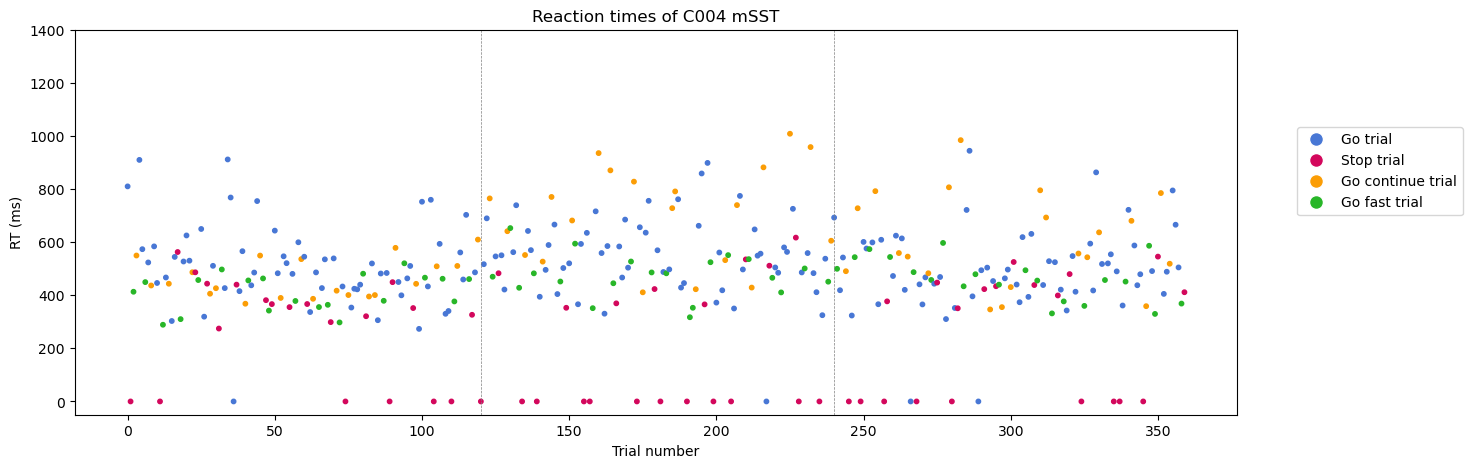

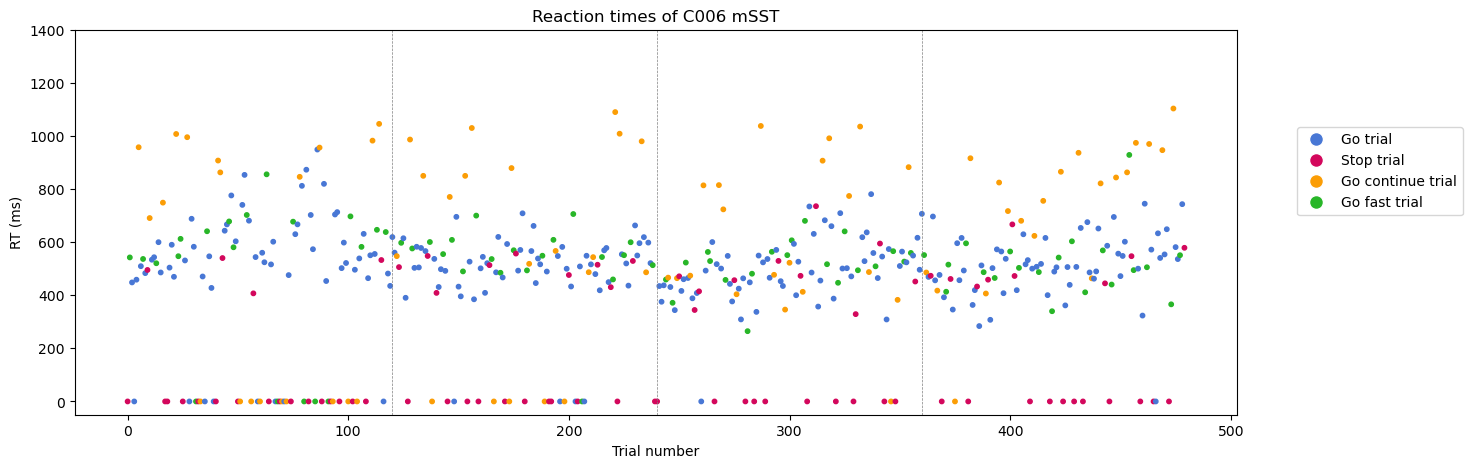

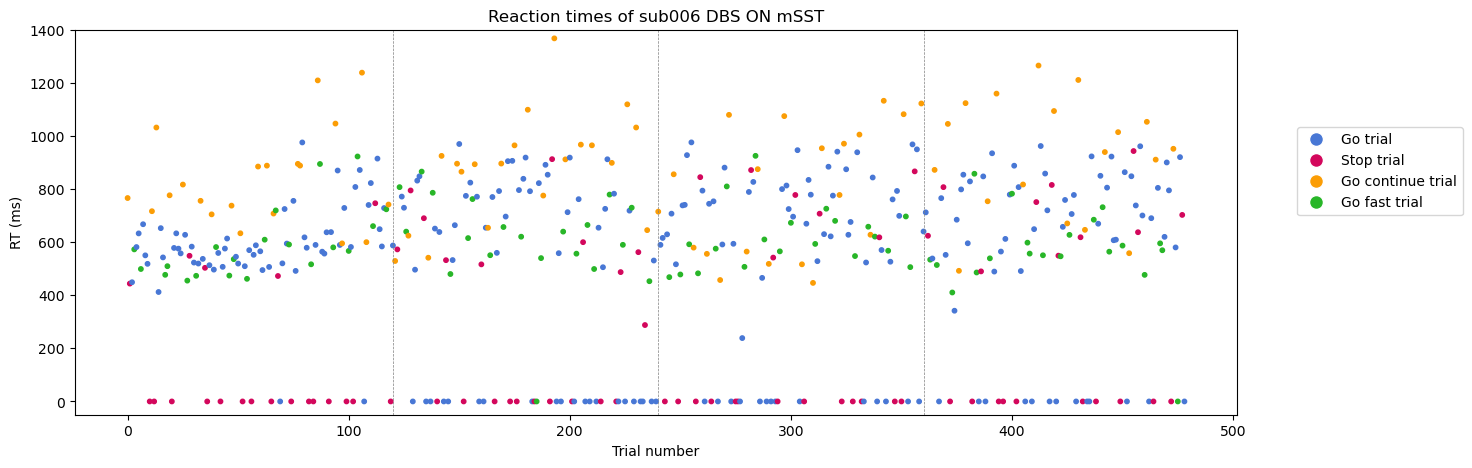

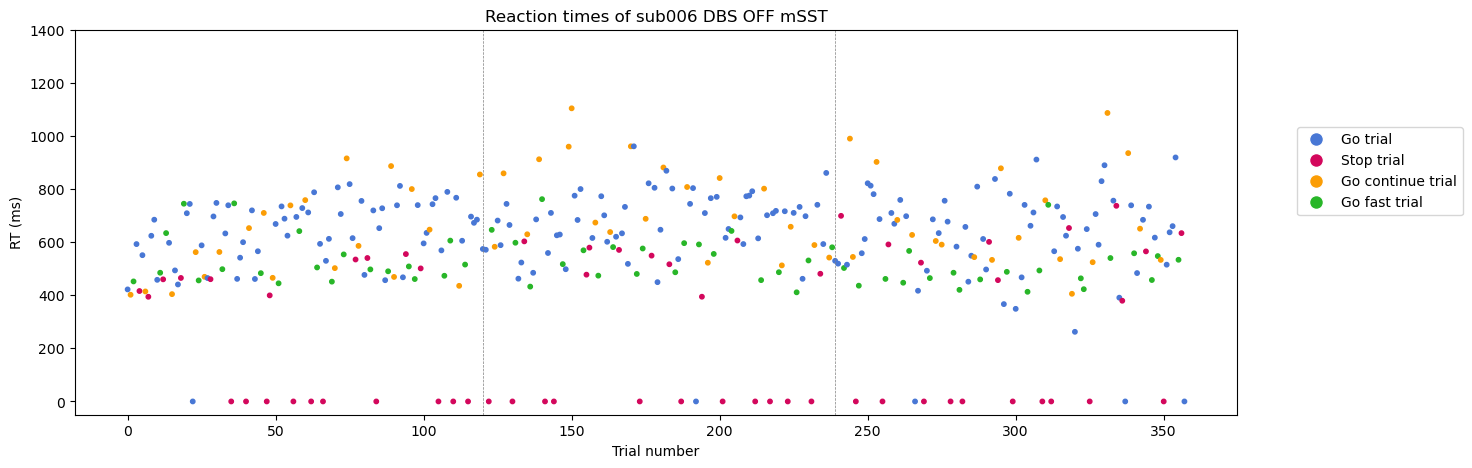

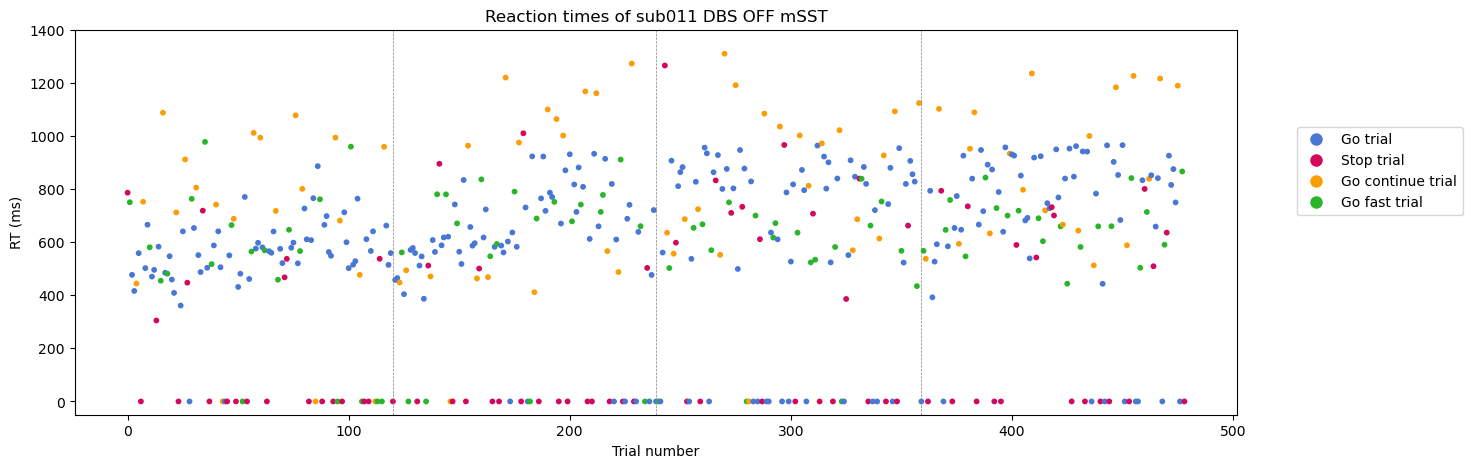

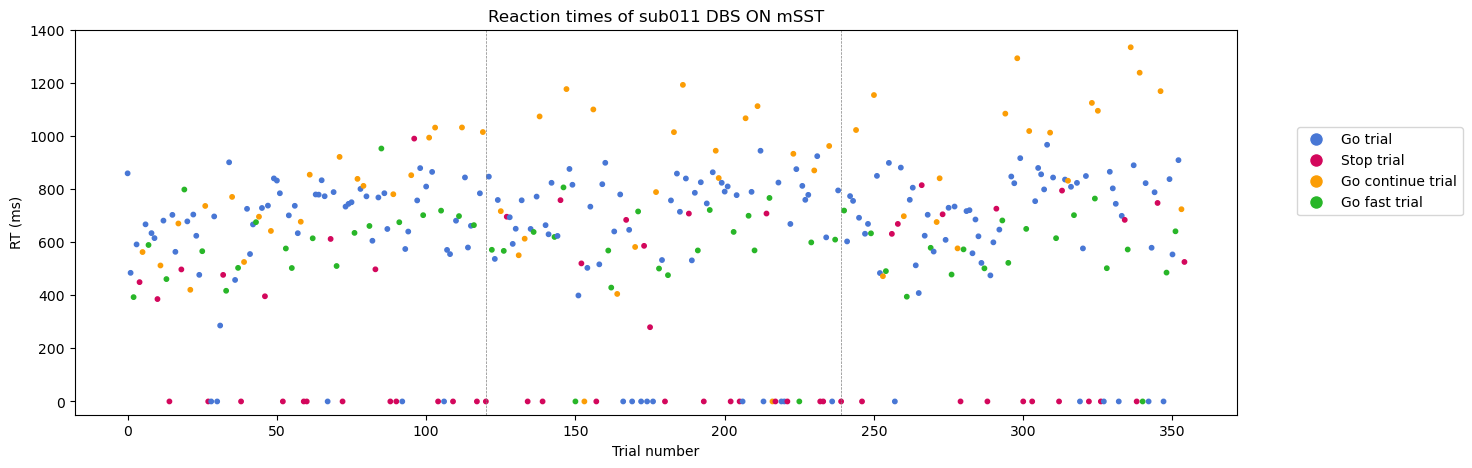

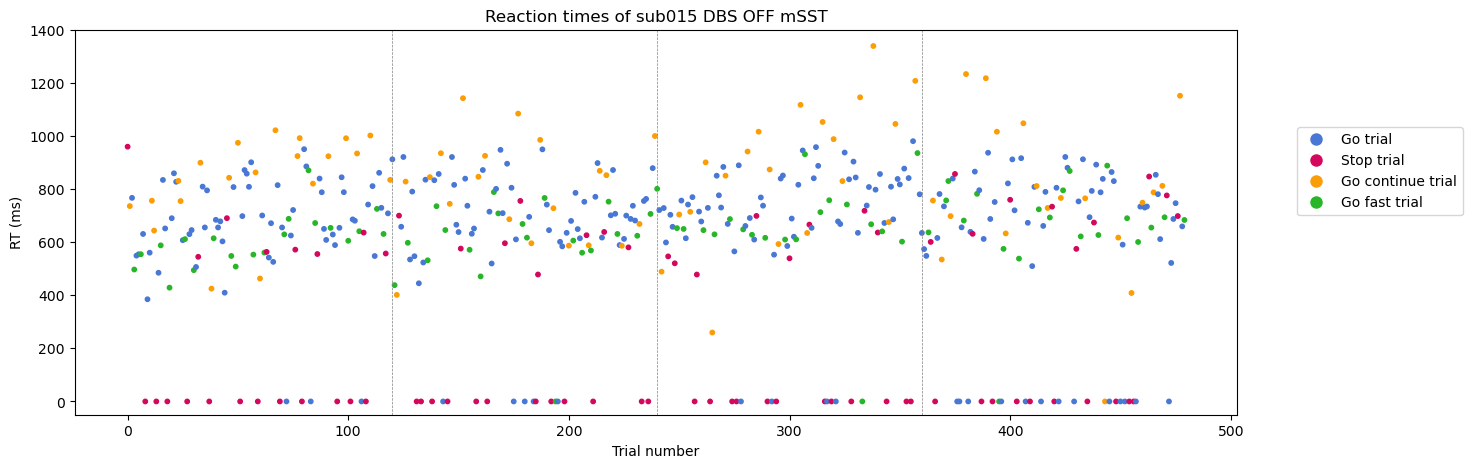

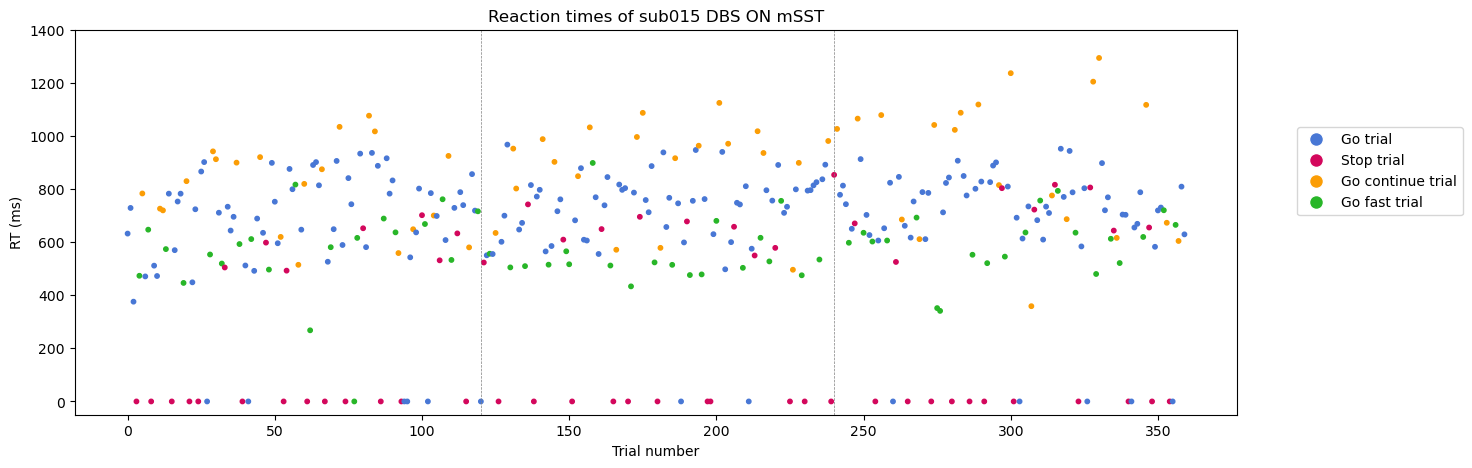

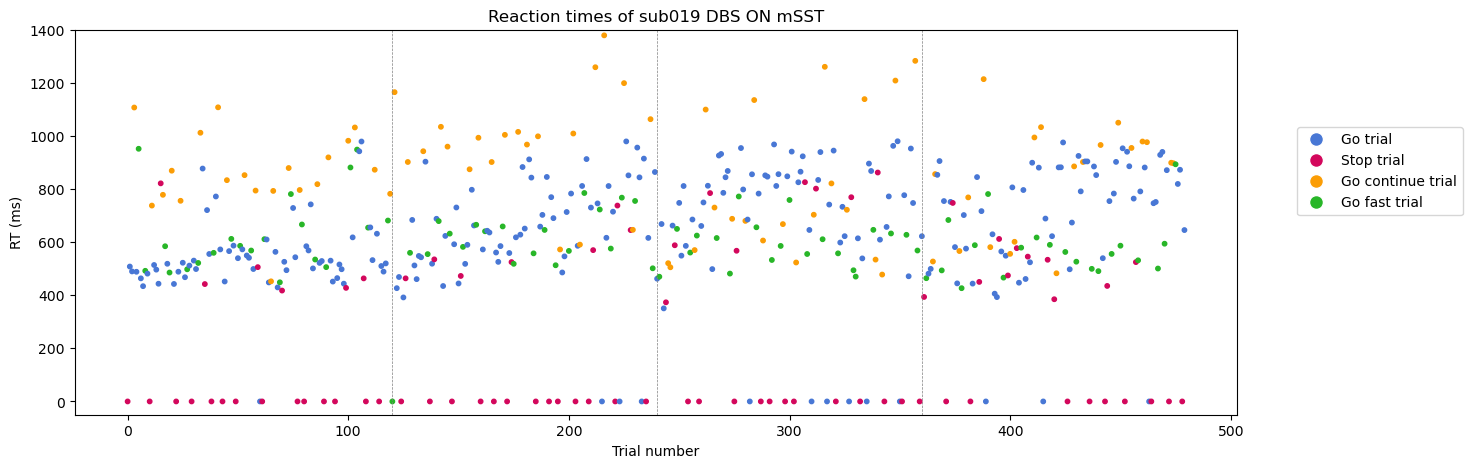

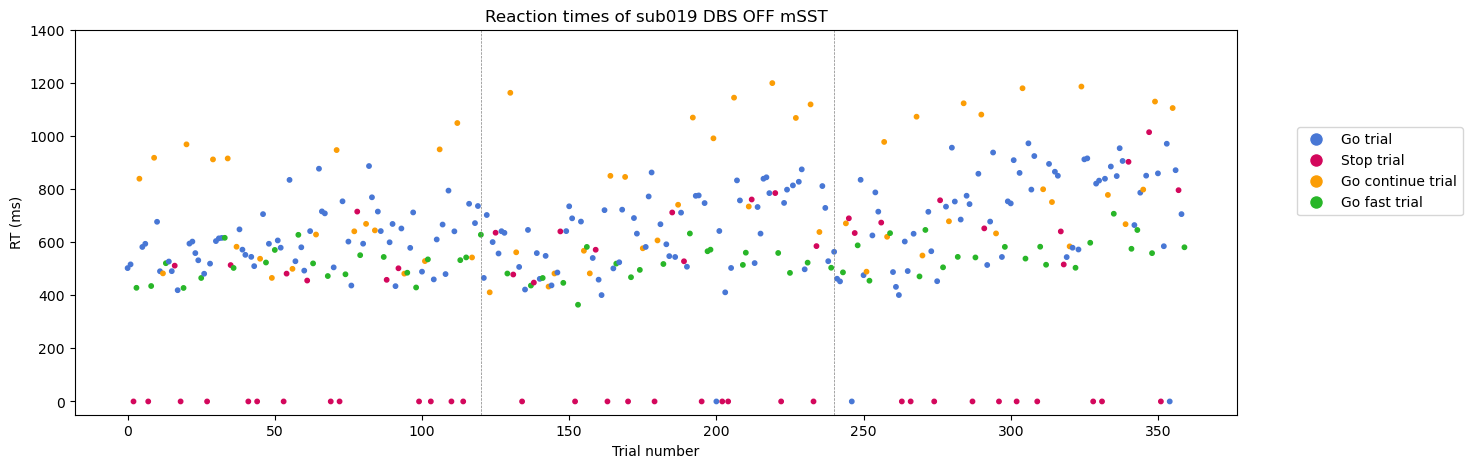

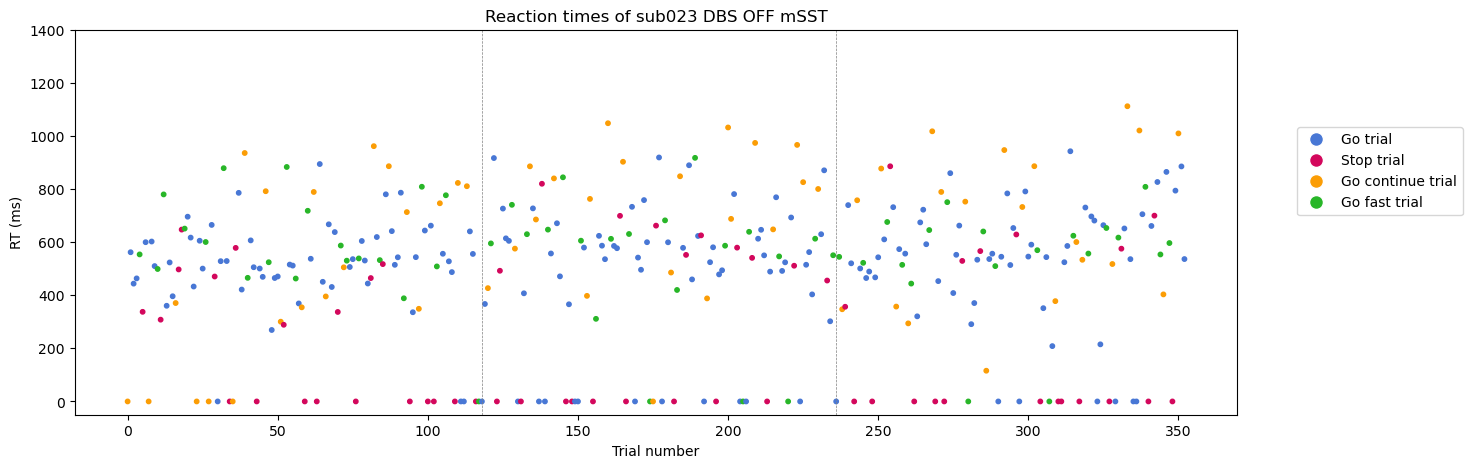

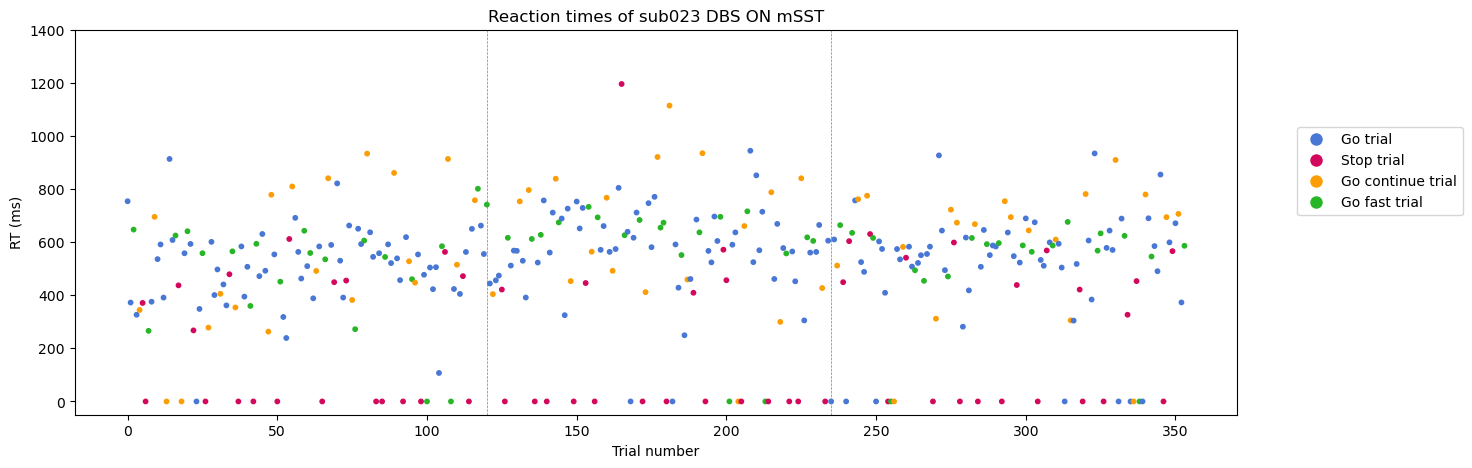

In [ ]:
# for sub in included_subjects:
#     trial_IDs = stats[sub]['trial IDs']
#     trial_RTs = stats[sub]['RTs (ms)']
#     # replace nans with 0
#     trial_RTs = [0 if np.isnan(rt) else rt for rt in trial_RTs]
#     blocks = stats[sub]['block number']
#     y = np.arange(len(trial_RTs))
#     plt.figure(figsize=(15, 5))
#     plt.scatter(y, trial_RTs, c=[trial_color_dict[trial_IDs[i]] for i in range(len(trial_IDs))], s=10)
#     plt.xlabel('Trial number')
#     plt.ylabel('RT (ms)')
#     plt.ylim(-50,1400)
#     plt.title(f'Reaction times of {sub}')
#     plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Go trial', markerfacecolor=trial_color_dict['go_trial'], markersize=10),
#                        plt.Line2D([0], [0], marker='o', color='w', label='Stop trial', markerfacecolor=trial_color_dict['stop_trial'], markersize=10),
#                        plt.Line2D([0], [0], marker='o', color='w', label='Go continue trial', markerfacecolor=trial_color_dict['go_continue_trial'], markersize=10),
#                        plt.Line2D([0], [0], marker='o', color='w', label='Go fast trial', markerfacecolor=trial_color_dict['go_fast_trial'], markersize=10)],
#                        loc='lower right', bbox_to_anchor=(1.2, 0.5))
#     # add a vertical line each time a new block starts:
#     # find the indices where the block number changes:
#     block_change_indices = [i for i in range(1, len(blocks)) if blocks[i] != blocks[i-1]]
#     for index in block_change_indices:
#         plt.axvline(x=index, color='grey', linestyle='--', linewidth=0.5)
#     plt.show()

# 3. Plot the inhibition functions #

## 3.1. For each subject and condition separately : to get a first impression of stopping difficulty and effect of DBS per subject ##

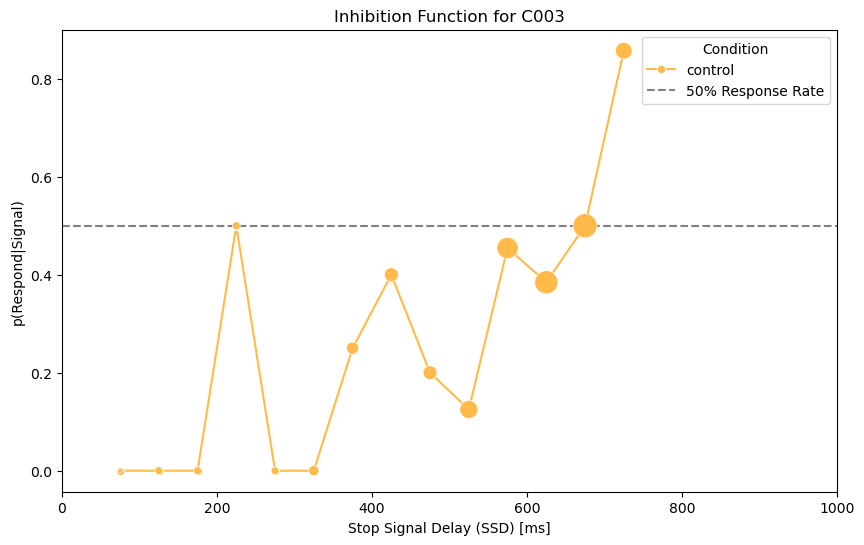

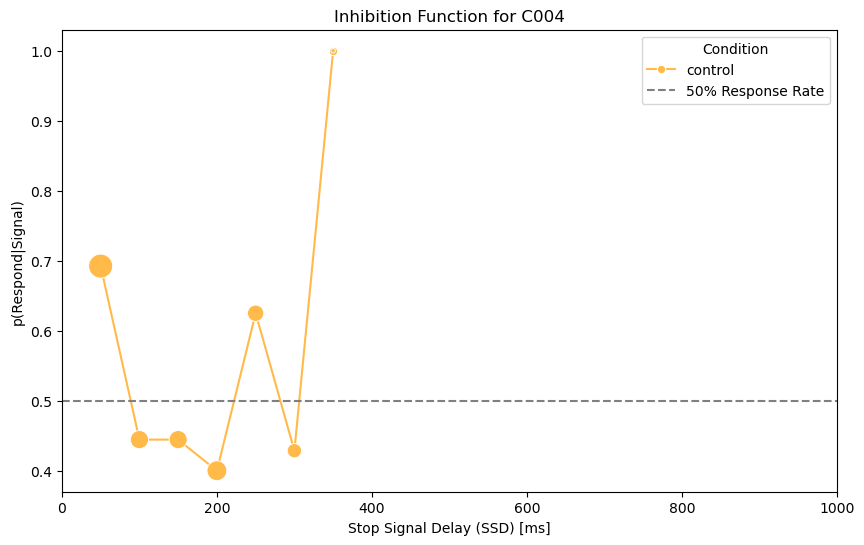

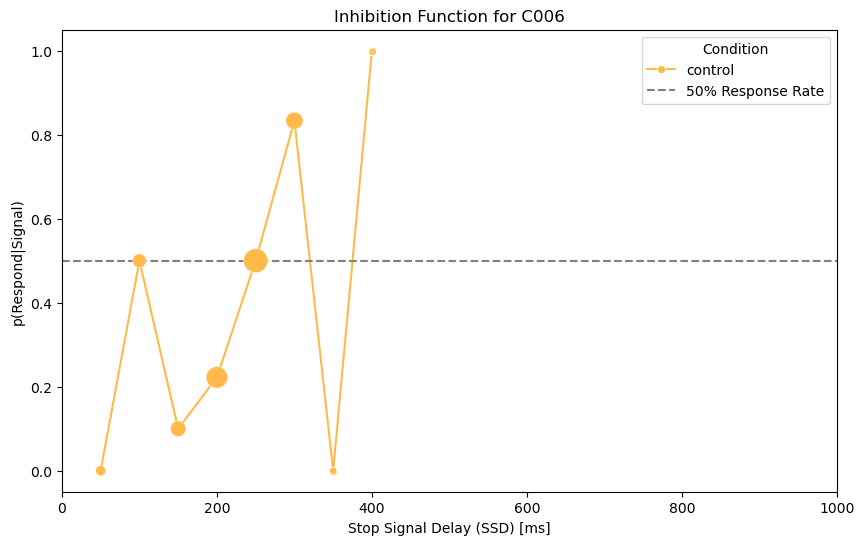

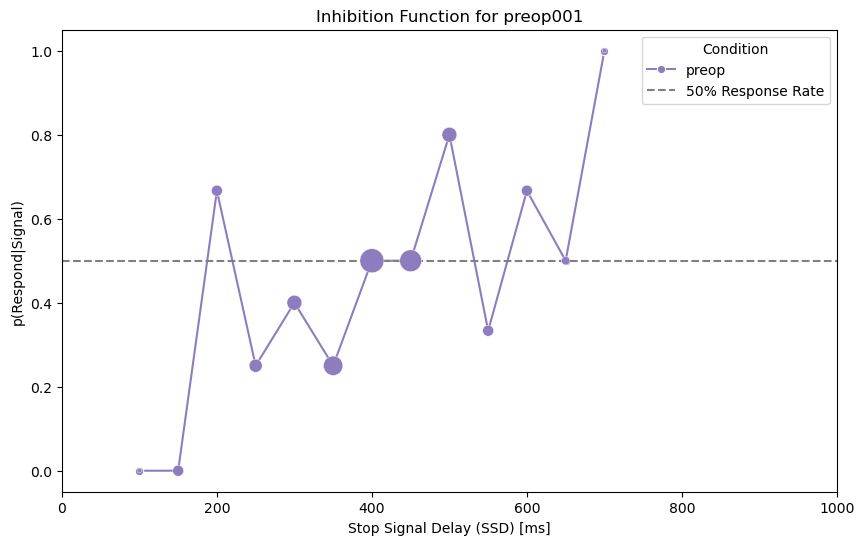

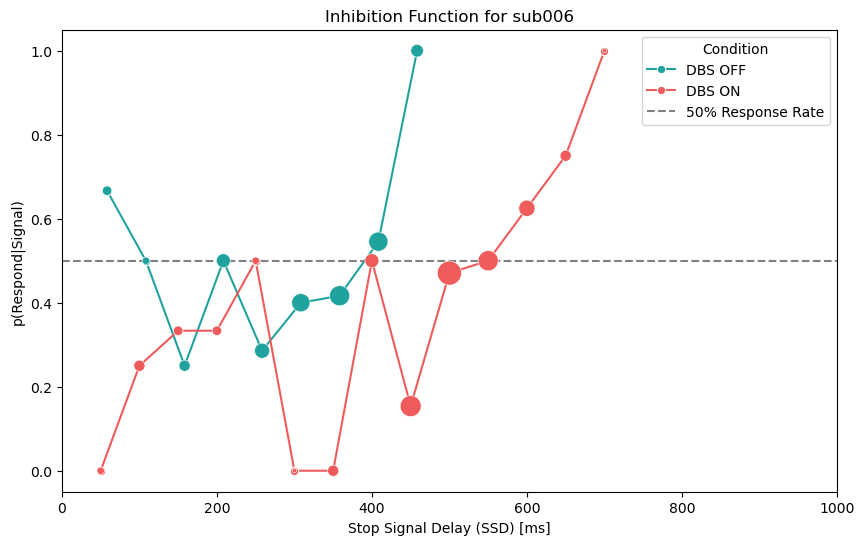

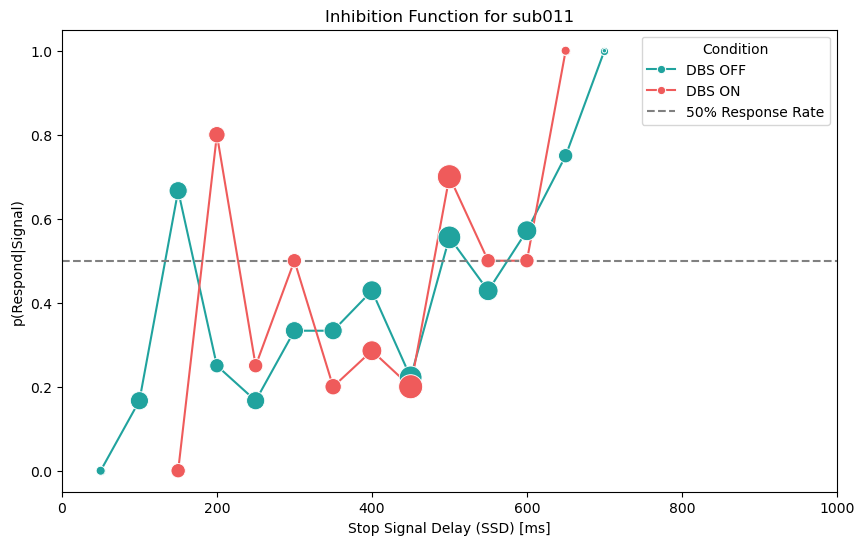

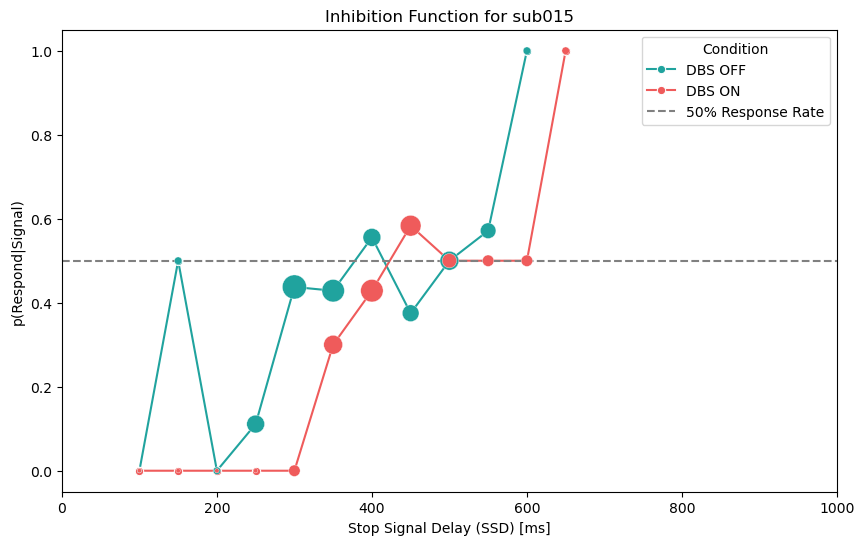

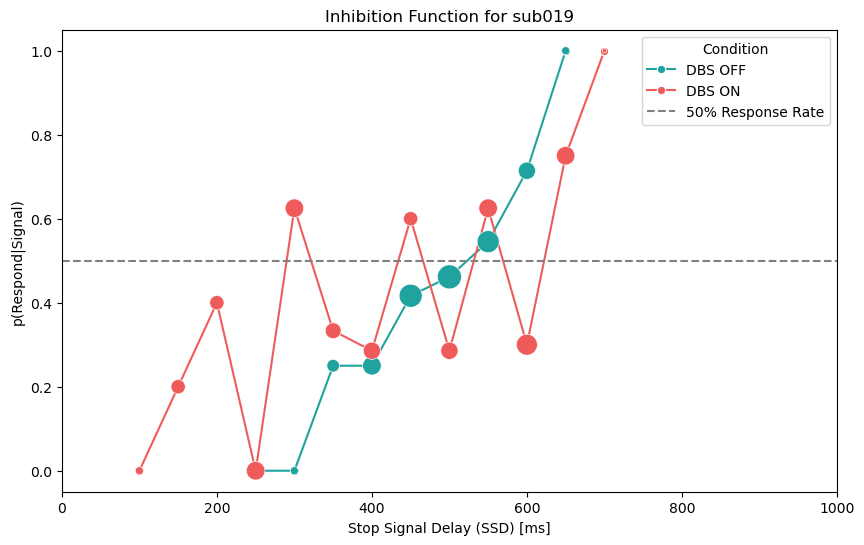

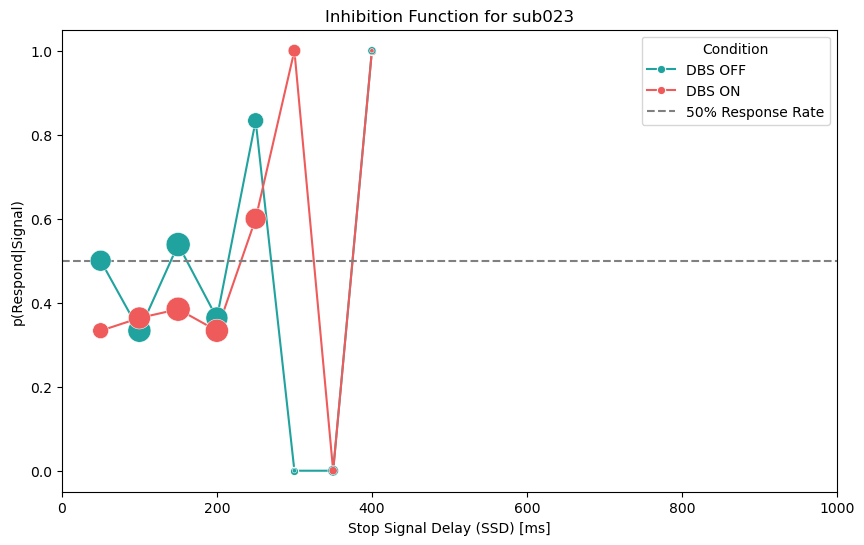

In [10]:
grouped_df = utils.create_grouped_df_for_inhibitory_functions(
    included_subjects,
    stats
)

plotting.plot_inhibitory_function_per_subject(grouped_df, color_dict, behav_results_saving_path)

## 3.2. Using the ZRFT method (Z-score) ##

Now processing C003 mSST
Now processing C004 mSST
Now processing C006 mSST
Now processing preop001 mSST
Now processing sub006 DBS OFF mSST
Now processing sub006 DBS ON mSST
Now processing sub011 DBS OFF mSST
Now processing sub011 DBS ON mSST
Now processing sub015 DBS OFF mSST
Now processing sub015 DBS ON mSST
Now processing sub019 DBS OFF mSST
Now processing sub019 DBS ON mSST
Now processing sub023 DBS OFF mSST
Now processing sub023 DBS ON mSST


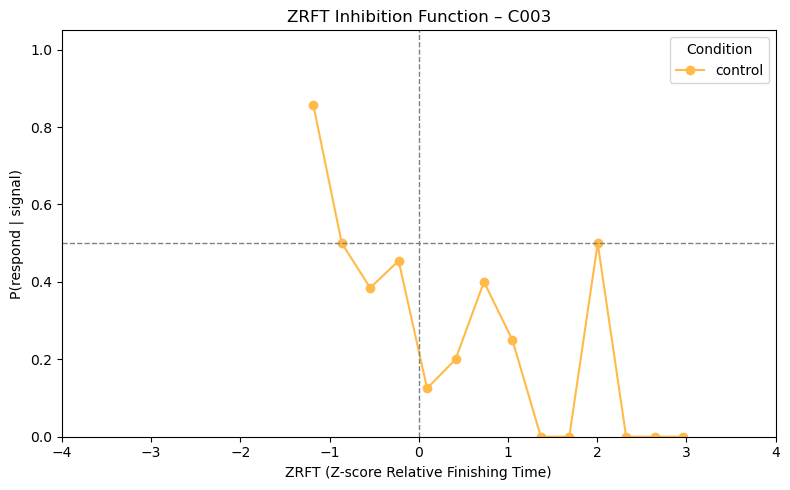

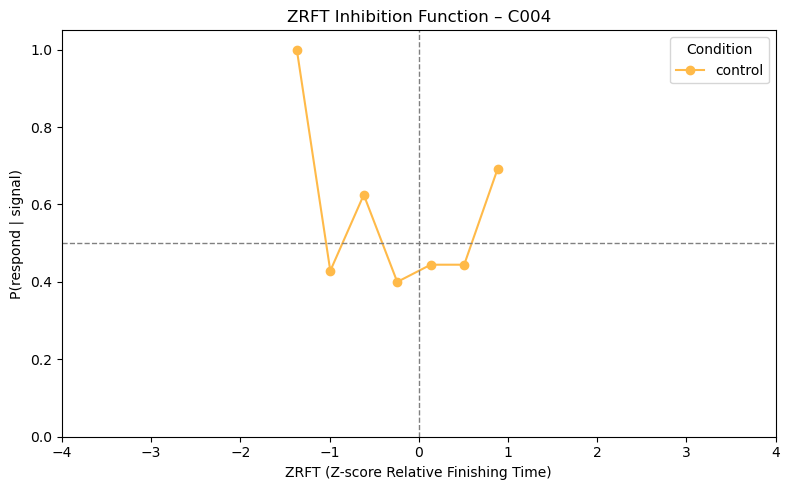

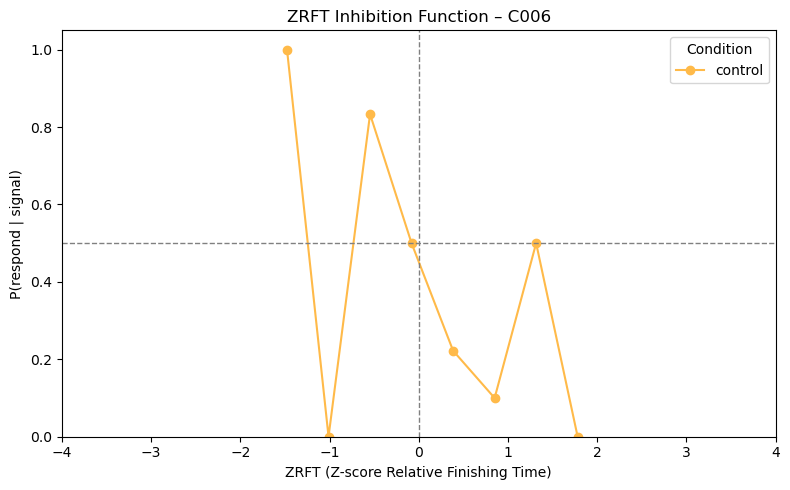

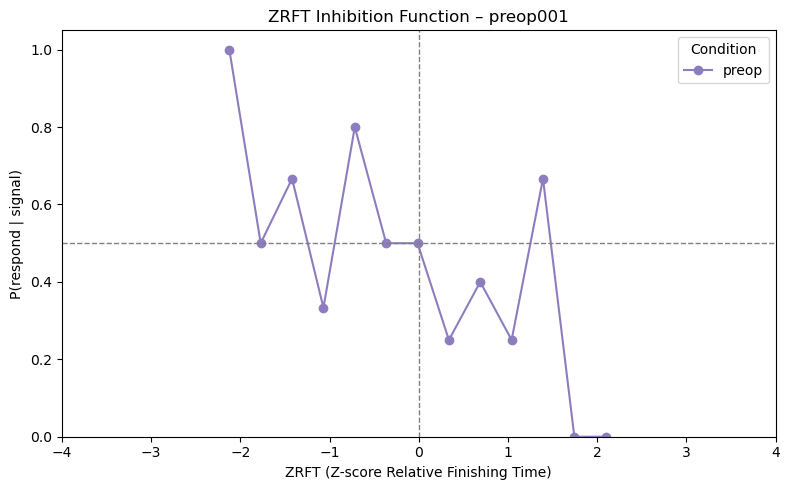

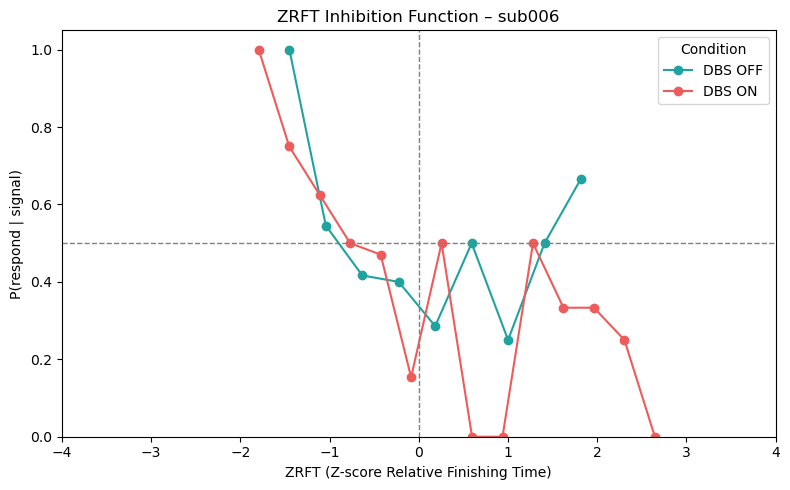

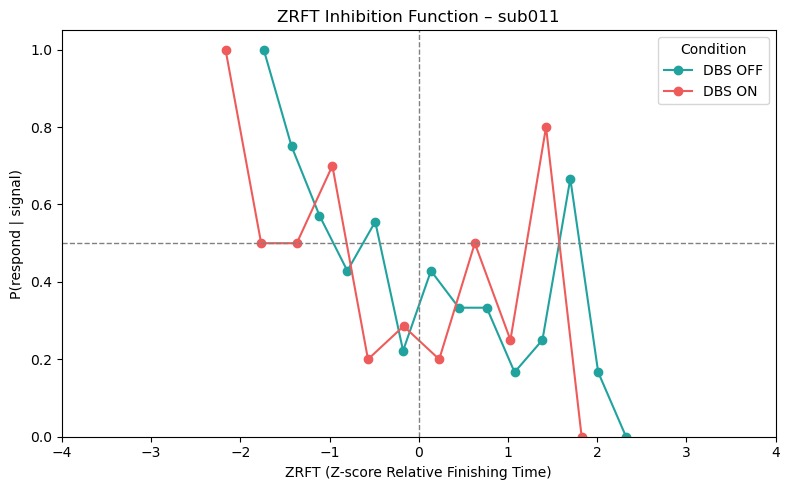

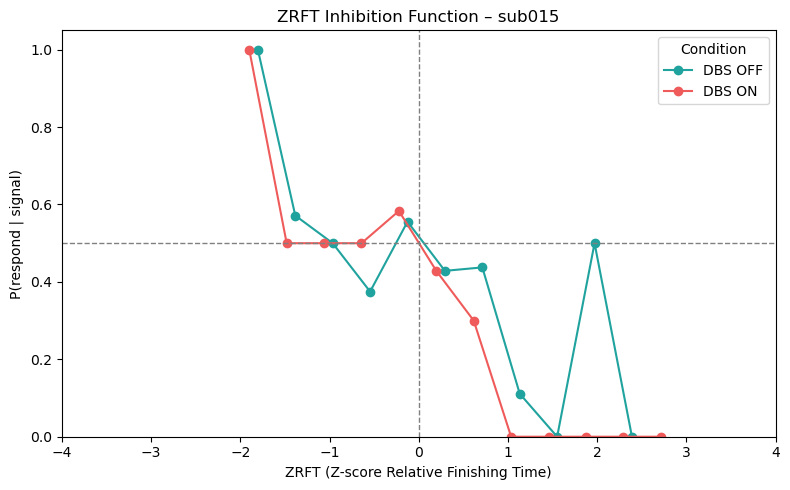

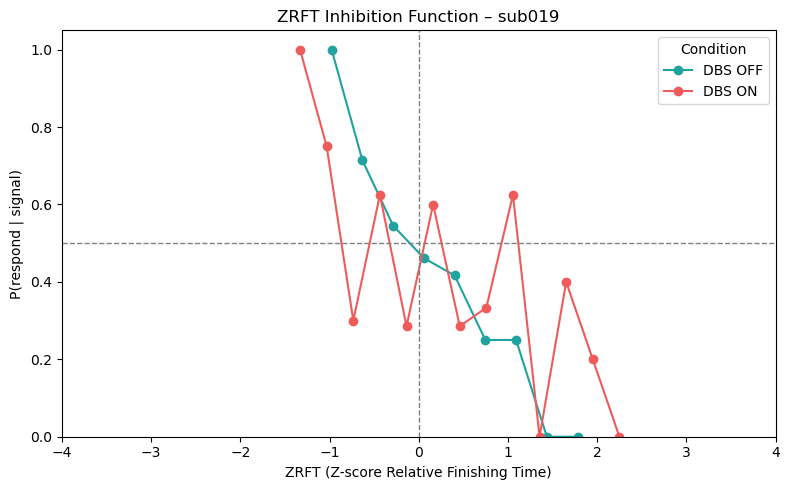

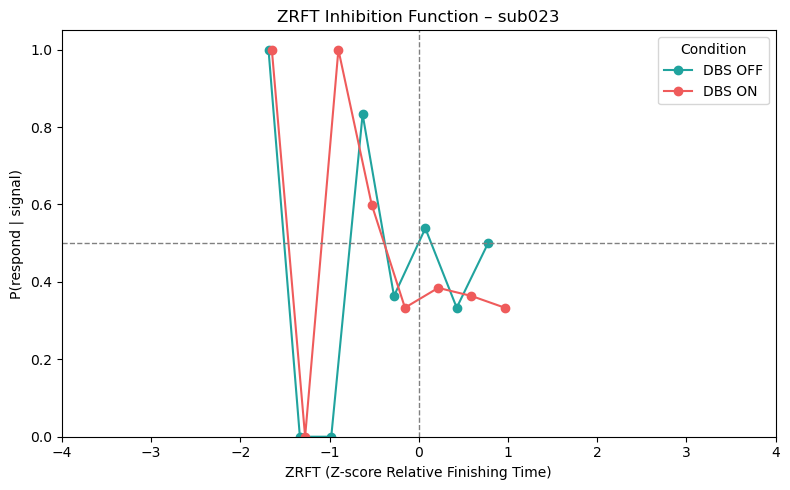

In [11]:
plotting.plot_inhibitory_function_per_subject_zscored(
    grouped_df,
    stats,
    color_dict,
    behav_results_saving_path
)

## 3.3. All groups plotted using the ZRFT method to compare across groups ##

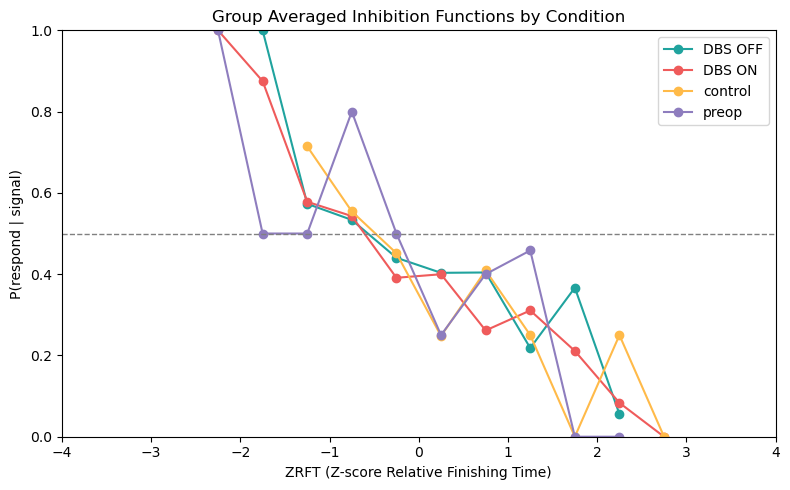

In [12]:
plotting.plot_inhibitory_functions_per_groups(
        grouped_df,
        stats,
        color_dict,
        behav_results_saving_path
)


# 4. Looking at reaction times on unsuccessful stop trials depending on SSD #

In [12]:
rt_inhibition_df = utils.create_inhibition_df(
    included_subjects,
    stats
)

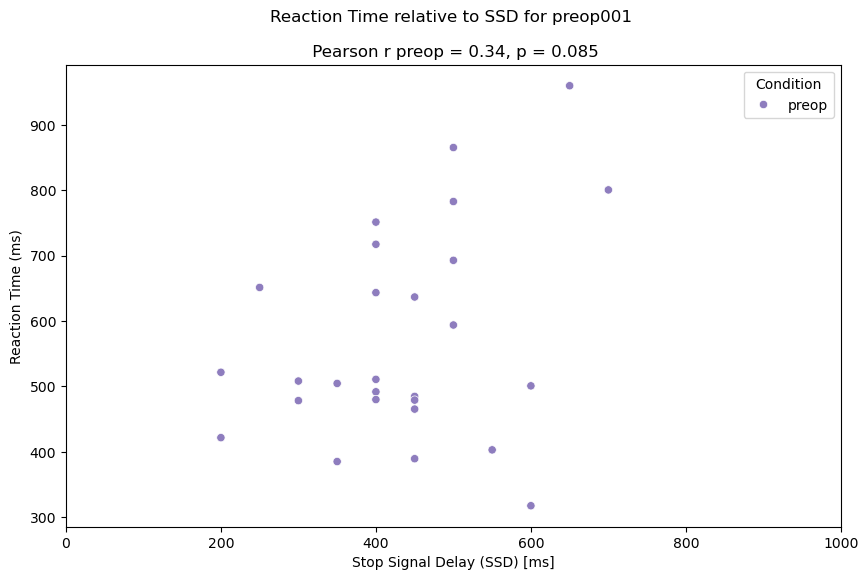

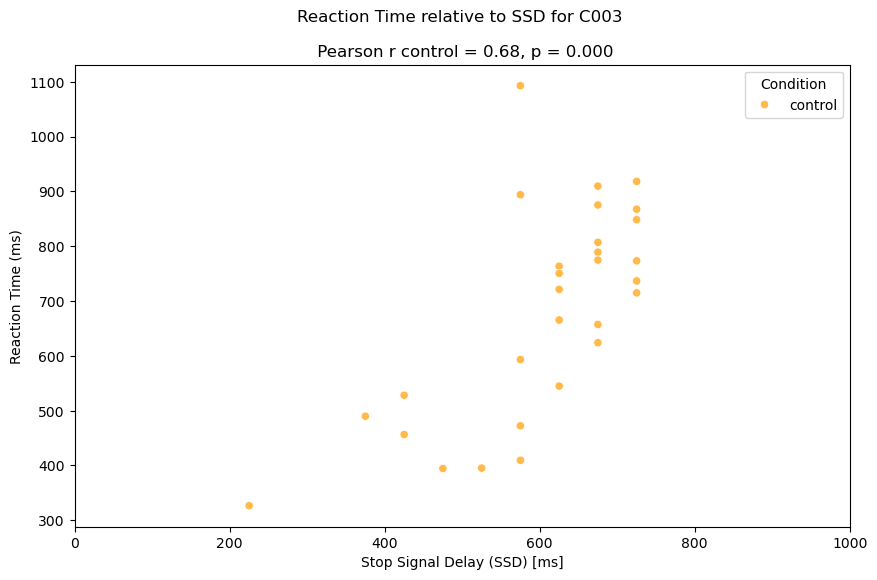

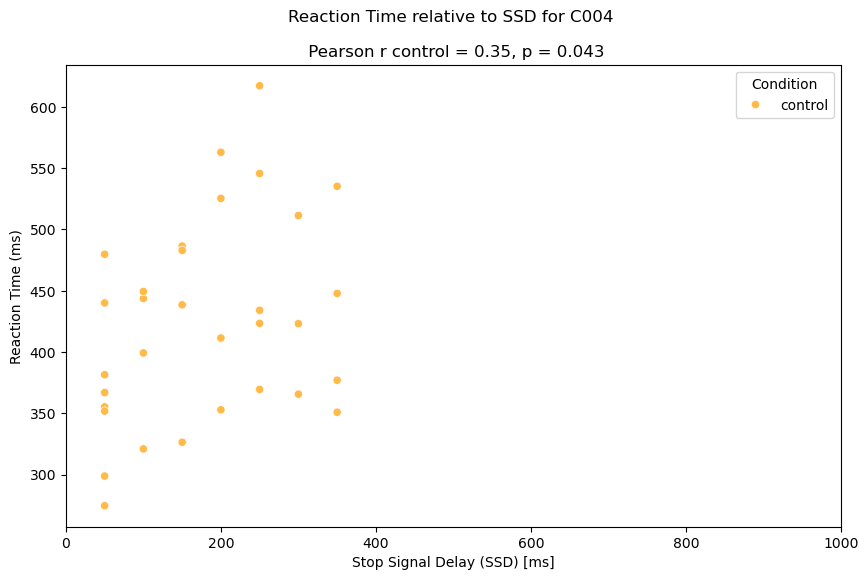

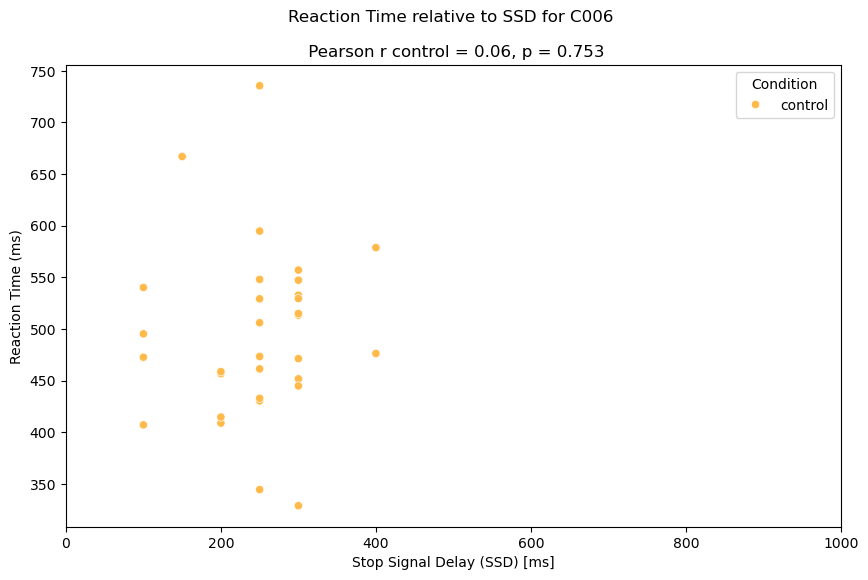

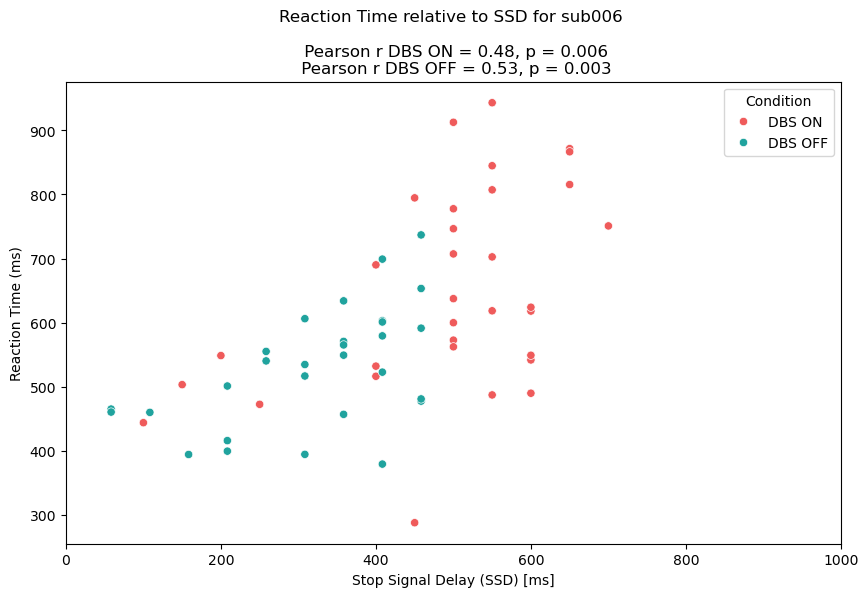

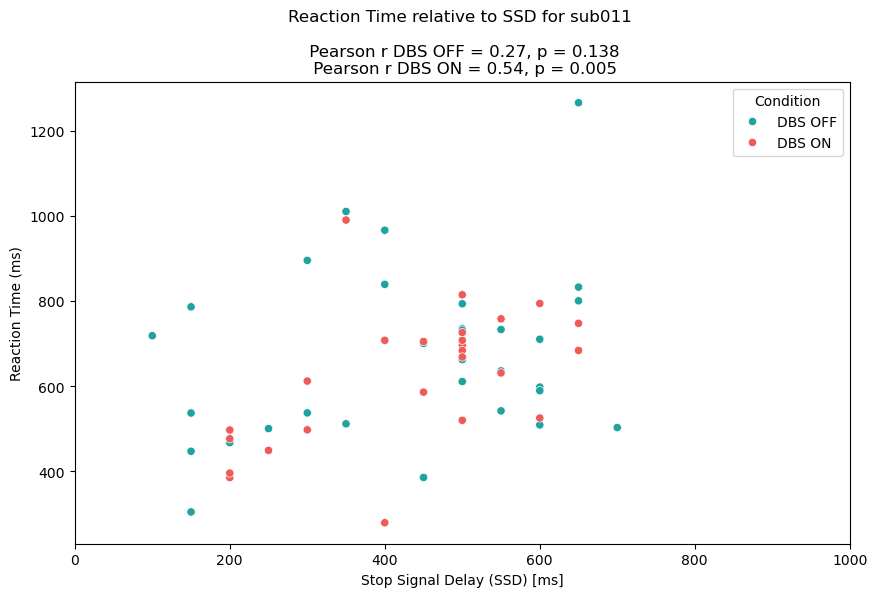

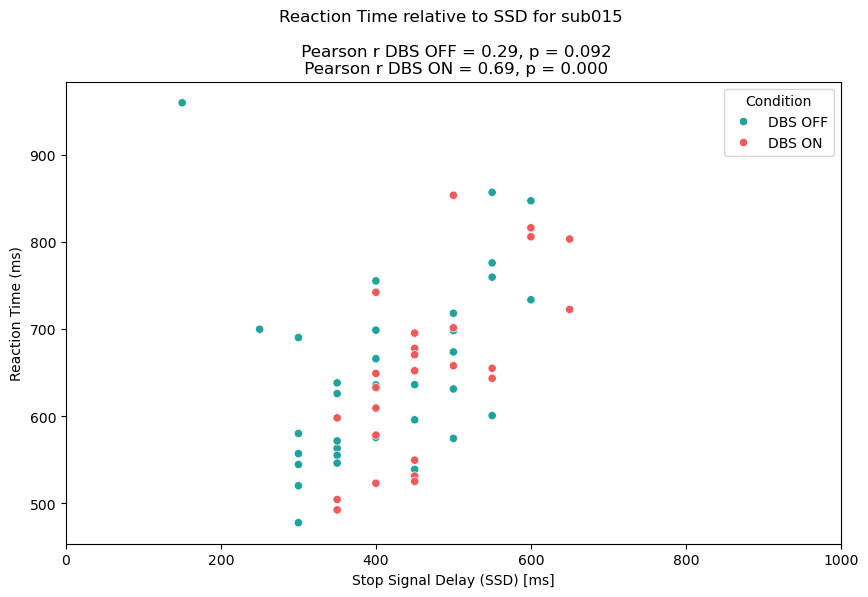

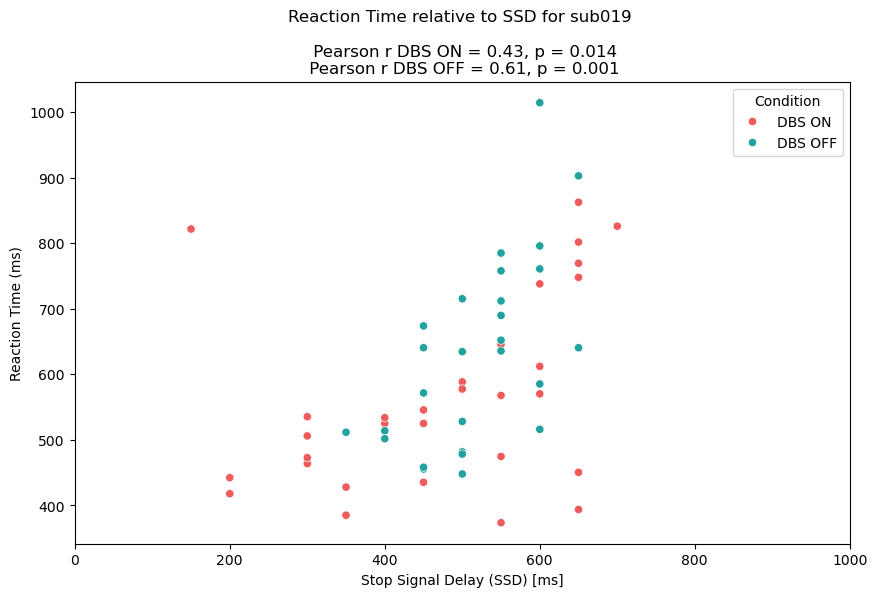

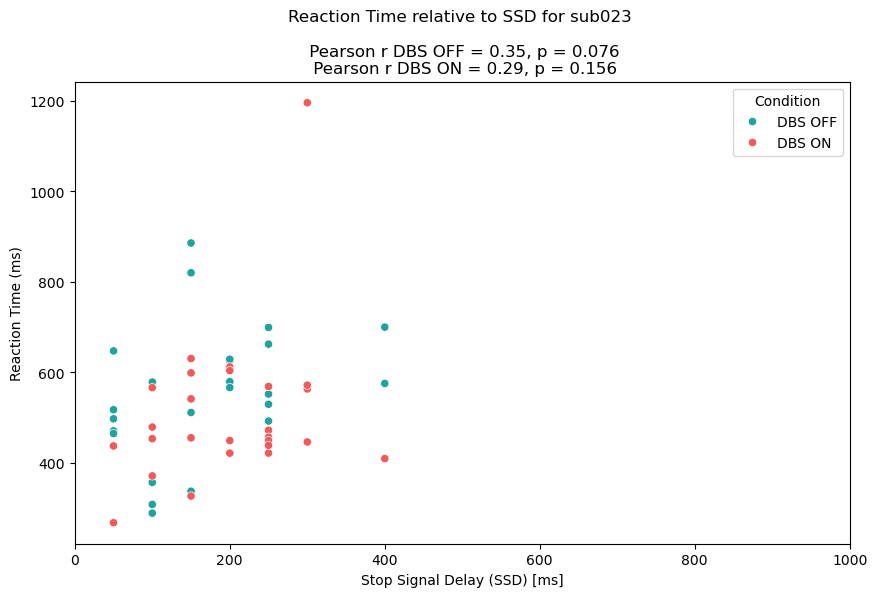

In [13]:
plotting.plot_reaction_time_relative_to_SSD(
        rt_inhibition_df,
        color_dict,
        behav_results_saving_path
)


# 5. Proactive inhibition #

## 5.1. Test if proactive inhibition is induced in all participants by comparing the reaction times for GO trials and GF trials ##

### 5.1.a. At the single subject and single session level ###

In [14]:
plotting.plot_go_gf_rt_single_sub(stats_OFF,
        stats_ON,
        stats_CONTROL,
        stats_PREOP,
        color_dict,
        behav_results_saving_path
        )

P-value for sub006 DBS OFF mSST (DBS OFF): 0.00000
P-value for sub011 DBS OFF mSST (DBS OFF): 0.06740
P-value for sub015 DBS OFF mSST (DBS OFF): 0.00000
P-value for sub019 DBS OFF mSST (DBS OFF): 0.00000
P-value for sub023 DBS OFF mSST (DBS OFF): 0.96375
P-value for sub006 DBS ON mSST (DBS ON): 0.00000
P-value for sub011 DBS ON mSST (DBS ON): 0.00000
P-value for sub015 DBS ON mSST (DBS ON): 0.00000
P-value for sub019 DBS ON mSST (DBS ON): 0.00115
P-value for sub023 DBS ON mSST (DBS ON): 0.99188
P-value for C003 mSST (control): 0.00000
P-value for C004 mSST (control): 0.00001
P-value for C006 mSST (control): 0.95221
P-value for preop001 mSST (preop): 0.00000
Excel file saved as 'p_values_proactive_inhibition.xlsx'.


### 5.1.b. At the group level (just out of interest) ###

P-value for DBS OFF (go_trial vs go_fast_trial): 1.77e-14
Stat for DBS OFF (go_trial vs go_fast_trial): 1.06e+05
P-value for DBS ON (go_trial vs go_fast_trial): 6.84e-18
Stat for DBS ON (go_trial vs go_fast_trial): 1.01e+05
P-value for control (go_trial vs go_fast_trial): 3.51e-27
Stat for control (go_trial vs go_fast_trial): 3.35e+04
P-value for preop (go_trial vs go_fast_trial): 3.48e-15
Stat for preop (go_trial vs go_fast_trial): 1.59e+03


<Figure size 1000x800 with 0 Axes>

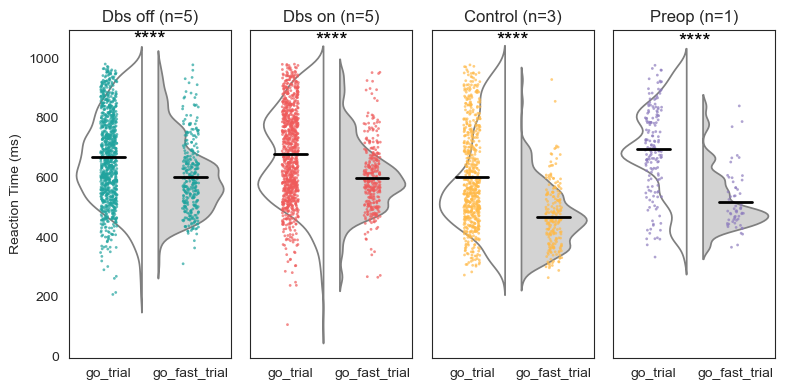

In [15]:
plotting.plot_go_gf_rt_group(
    stats_OFF,
    stats_ON,
    stats_CONTROL,
    stats_PREOP,
    color_dict,
    behav_results_saving_path,
    show_fig = True
)

## 5.2. Assess proactive inhibition in included subjects ##

### 5.2.1. Assess the effect of STN-DBS on proactive inhibition ###

Updated sub006 DBS OFF mSST.json with Prep Cost (ms) = 128.5561893674901
Updated sub011 DBS OFF mSST.json with Prep Cost (ms) = 35.85831773197003
Updated sub015 DBS OFF mSST.json with Prep Cost (ms) = 74.37784227735119
Updated sub019 DBS OFF mSST.json with Prep Cost (ms) = 129.02417588350238
Negative preparation cost for sub023 DBS OFF mSST: -36.35863157621816 ms.
Updated sub023 DBS OFF mSST.json with Prep Cost (ms) = -36.35863157621816
Updated sub006 DBS ON mSST.json with Prep Cost (ms) = 88.17520111537817
Updated sub011 DBS ON mSST.json with Prep Cost (ms) = 114.6072889870801
Updated sub015 DBS ON mSST.json with Prep Cost (ms) = 156.96502725883124
Updated sub019 DBS ON mSST.json with Prep Cost (ms) = 74.25875662612702
Negative preparation cost for sub023 DBS ON mSST: -29.977010248419106 ms.
Updated sub023 DBS ON mSST.json with Prep Cost (ms) = -29.977010248419106


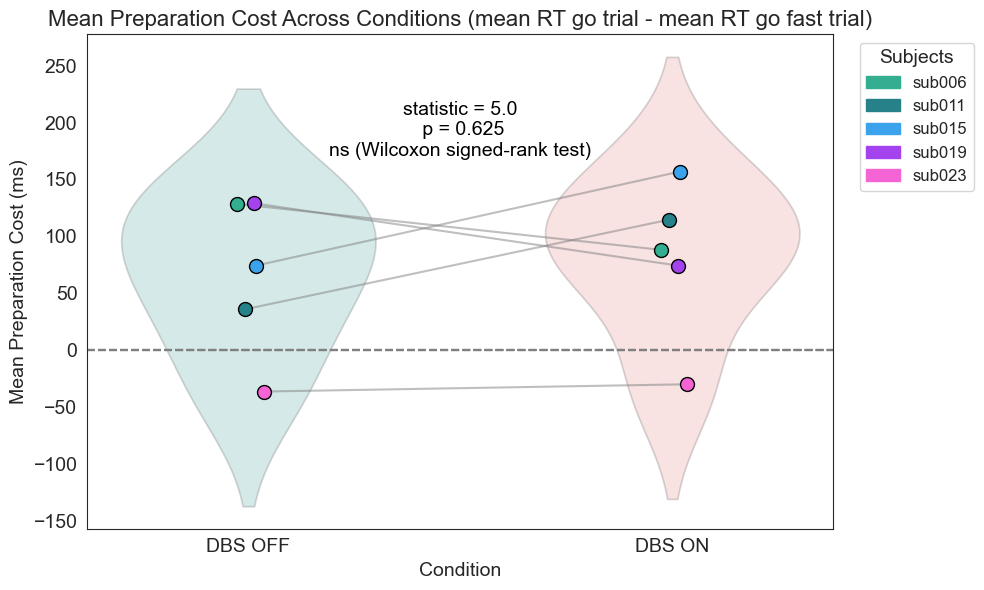

In [16]:
df_reshaped = plotting.plot_prep_cost_on_vs_off_only_sub_with_2_sessions(
        stats_OFF,
        stats_ON,
        subject_colors,
        behav_results_saving_path,
        show_fig = True
)

In [17]:
plotting.plot_prep_cost_on_vs_off_all_sub(
        stats_OFF,
        stats_ON,
        subject_colors,
        behav_results_saving_path)

Updated sub006 DBS OFF mSST.json with Prep Cost (ms) = 128.5561893674901
Updated sub011 DBS OFF mSST.json with Prep Cost (ms) = 35.85831773197003
Updated sub015 DBS OFF mSST.json with Prep Cost (ms) = 74.37784227735119
Updated sub019 DBS OFF mSST.json with Prep Cost (ms) = 129.02417588350238
Updated sub023 DBS OFF mSST.json with Prep Cost (ms) = -36.35863157621816
Updated sub006 DBS ON mSST.json with Prep Cost (ms) = 88.17520111537817
Updated sub011 DBS ON mSST.json with Prep Cost (ms) = 114.6072889870801
Updated sub015 DBS ON mSST.json with Prep Cost (ms) = 156.96502725883124
Updated sub019 DBS ON mSST.json with Prep Cost (ms) = 74.25875662612702
Updated sub023 DBS ON mSST.json with Prep Cost (ms) = -29.977010248419106
Mean and standard deviation for each condition:
                mean        std
Condition                      
DBS OFF    66.291579  69.535777
DBS ON     80.805853  69.485199


### 5.2.2. Assess if the value in DBS OFF can predict the change with DBS ON ###

                            OLS Regression Results                            
Dep. Variable:                 Change   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                 -0.046
Method:                 Least Squares   F-statistic:                    0.8256
Date:                Wed, 23 Jul 2025   Prob (F-statistic):              0.431
Time:                        15:49:52   Log-Likelihood:                -26.762
No. Observations:                   5   AIC:                             57.52
Df Residuals:                       3   BIC:                             56.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            43.0784     43.106      0.999

c:\Users\Juliette\anaconda3\envs\excel_analysis\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


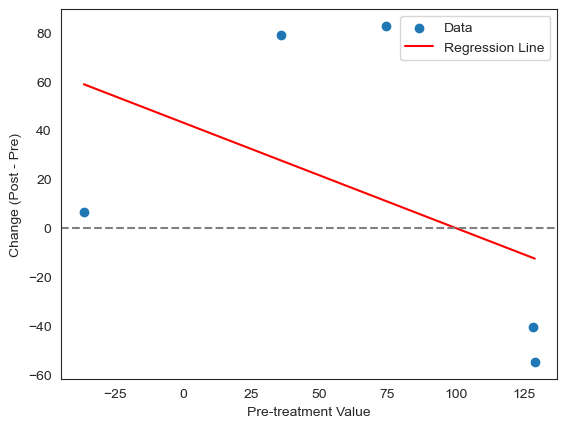

In [18]:
df_reshaped_cleaned = df_reshaped.dropna()
pre_treatment = df_reshaped_cleaned["DBS OFF"].values
post_treatment = df_reshaped_cleaned["DBS ON"].values

# Compute the change
change = post_treatment - pre_treatment

# Create a DataFrame
df = pd.DataFrame({'Pre_treatment': pre_treatment, 'Change': change})

# Add a constant term for the intercept
X = sm.add_constant(df['Pre_treatment'])  # Predictor (Pre-treatment values)
y = df['Change']  # Dependent variable (Change)

# Fit the model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

# Scatter plot
plt.scatter(df['Pre_treatment'], df['Change'], label="Data")

# Plot regression line
x_vals = np.linspace(min(df['Pre_treatment']), max(df['Pre_treatment']), 100)
y_vals = model.params[0] + model.params[1] * x_vals
plt.plot(x_vals, y_vals, color='red', label="Regression Line")

plt.axhline(0, linestyle='--', color='gray')  # Reference line at y=0
plt.xlabel("Pre-treatment Value")
plt.ylabel("Change (Post - Pre)")
plt.legend()
plt.show()


### 5.2.3. Compare all conditions ###

Mean and standard deviation for each condition:
                 mean         std
Condition                        
DBS OFF     66.291579   69.535777
DBS ON      80.805853   69.485199
control    130.318360  178.208020
preop      178.531925         NaN

Pairwise Mann-Whitney U tests (alternative='two-sided'):
control vs DBS OFF: U-statistic=9.0, p-value=0.78571
control vs DBS ON: U-statistic=8.0, p-value=1.00000
control vs preop: U-statistic=1.0, p-value=1.00000
DBS OFF vs DBS ON: U-statistic=11.0, p-value=0.84127
DBS OFF vs preop: U-statistic=0.0, p-value=0.33333
DBS ON vs preop: U-statistic=0.0, p-value=0.33333


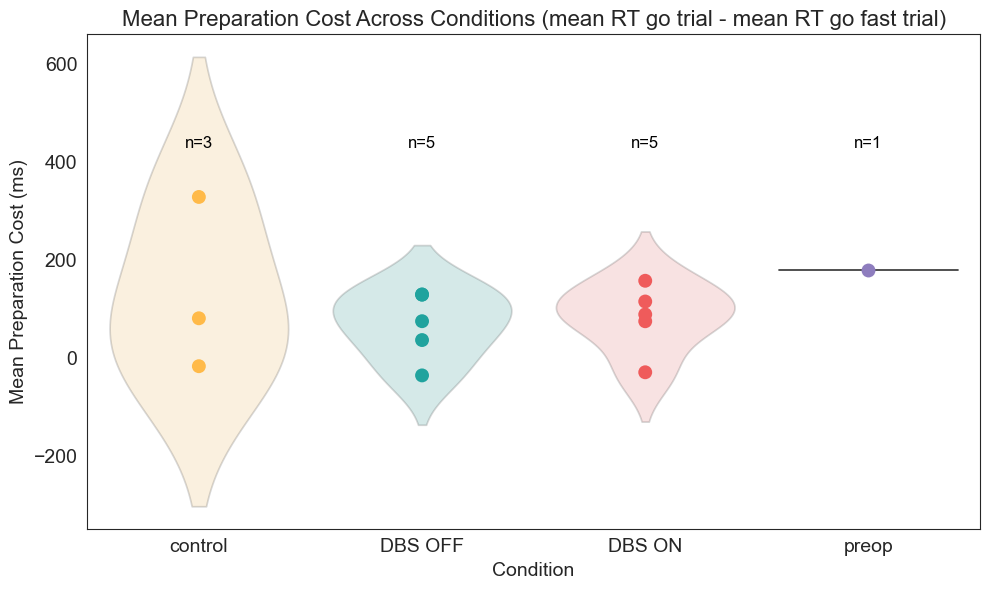

In [19]:
df_proactive_all = plotting.plot_prep_cost_all_groups(
    stats_OFF,
    stats_ON,
    stats_CONTROL,
    stats_PREOP,
    color_dict,
    behav_results_saving_path,
    show_fig = True
)

# 6. Reactive inhibition #

Updated sub006 DBS OFF mSST.json with mean SSD (ms) = 304.1666666666666
Updated sub006 DBS OFF mSST.json with SSRT (ms) = 373.013133359685
Updated sub011 DBS OFF mSST.json with mean SSD (ms) = 381.25
Updated sub011 DBS OFF mSST.json with SSRT (ms) = 278.33400000818074
Updated sub015 DBS OFF mSST.json with mean SSD (ms) = 374.99999999999994
Updated sub015 DBS OFF mSST.json with SSRT (ms) = 346.0482999216766
Updated sub019 DBS OFF mSST.json with mean SSD (ms) = 481.66666666666663
Updated sub019 DBS OFF mSST.json with SSRT (ms) = 150.36093329389894
Updated sub023 DBS OFF mSST.json with mean SSD (ms) = 162.5
Updated sub023 DBS OFF mSST.json with SSRT (ms) = 416.0146998241544
Updated sub006 DBS ON mSST.json with mean SSD (ms) = 439.99999999999994
Updated sub006 DBS ON mSST.json with SSRT (ms) = 260.3373000770808
Updated sub011 DBS ON mSST.json with mean SSD (ms) = 403.33333333333326
Updated sub011 DBS ON mSST.json with SSRT (ms) = 340.7813666729878
Updated sub015 DBS ON mSST.json with mean 

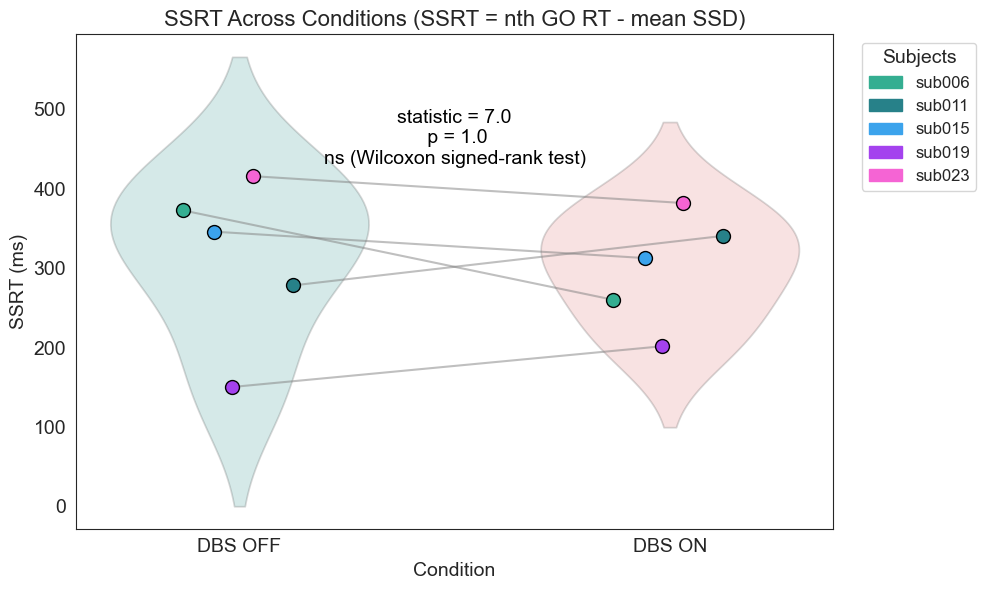

In [20]:
plotting.plot_SSRT_on_vs_off_all_sub(
        stats_OFF,
        stats_ON,
        subject_colors,
        behav_results_saving_path,
        show_fig= True
)

     Subject Condition   SSRT (ms)
0       C003   control  192.645320
1       C004   control  361.845967
2       C006   control  292.962300
3     sub006   DBS OFF  373.013133
4     sub011   DBS OFF  278.334000
5     sub015   DBS OFF  346.048300
6     sub019   DBS OFF  150.360933
7     sub023   DBS OFF  416.014700
8     sub006    DBS ON  260.337300
9     sub011    DBS ON  340.781367
10    sub015    DBS ON  312.829433
11    sub019    DBS ON  201.743000
12    sub023    DBS ON  382.164867
13  preop001     preop  299.085600
Mean and standard deviation for each condition:
                 mean         std
Condition                        
DBS OFF    312.754213  103.632391
DBS ON     299.571193   70.365879
control    282.484529   85.085560
preop      299.085600         NaN

Pairwise Mann-Whitney U tests (alternative='two-sided'):
control vs DBS OFF: U-statistic=6.0, p-value=0.78571
control vs DBS ON: U-statistic=6.0, p-value=0.78571
control vs preop: U-statistic=1.0, p-value=1.00000
DBS OFF v

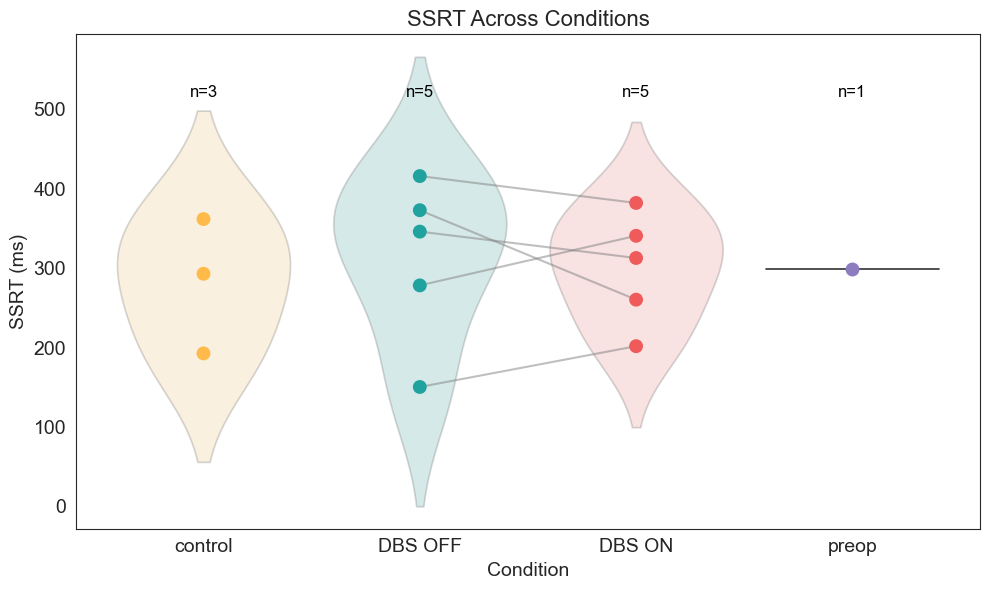

In [21]:
df_reactive_all = plotting.plot_SSRT_all_groups(
    stats_OFF,
    stats_ON,
    stats_CONTROL,
    stats_PREOP,
    color_dict,
    behav_results_saving_path,
    show_fig = True        
)

In [ ]:
df_proactive_all

In [ ]:
df_reactive_all

# 7. Correlation proactive / reactive inhibition ? #

In [22]:
df_merged = utils.prepare_merged_dataframe(
    df_proactive_all,
    df_reactive_all,
    stats_OFF,
    stats_ON,
    stats_CONTROL,
    stats_PREOP,
    behav_results_saving_path
)

In [32]:
df_merged

Subject  preparation cost (ms)   SSRT (ms)  mean SSD (ms)
0     C003 control             328.185354  192.645320     529.430380
1     C004 control              80.319392  361.845967     173.333333
2     C006 control             -17.549665  292.962300     213.750000
3   sub006 DBS OFF             128.556189  373.013133     304.166667
4   sub011 DBS OFF              35.858318  278.334000     381.250000
5   sub015 DBS OFF              74.377842  346.048300     375.000000
6   sub019 DBS OFF             129.024176  150.360933     481.666667
7   sub023 DBS OFF             -36.358632  416.014700     162.500000
8    sub006 DBS ON              88.175201  260.337300     440.000000
9    sub011 DBS ON             114.607289  340.781367     403.333333
10   sub015 DBS ON             156.965027  312.829433     421.666667
11   sub019 DBS ON              74.258757  201.743000     416.250000
12   sub023 DBS ON             -29.977010  382.164867     180.833333
13  preop001 preop             178.531925  299.085600     395.000000

In [95]:
# Copy df_merged but keep only subjects starting with "sub":
df_merged_subs = df_merged[df_merged['Subject'].str.startswith('sub')].copy()
df_merged_subs

# Add a new column 'Session' using a session_dict  :
df_merged_subs['Session'] = df_merged_subs['Subject'].map(session_dict)

df_merged_subs['BIS'] = df_merged_subs['Subject'].map(bis_score_dict)

df_merged_subs['BDI'] = df_merged_subs['Subject'].map(bdi_score_dict)

# Add a new column 'DBS' to df_merged_subs based on the 'Subject' column:
df_merged_subs['DBS'] = df_merged_subs['Subject'].apply(
    lambda x: 'ON' if 'ON' in x else 'OFF')

# in the Subject column, only keep th efirst part of the string before the space:
df_merged_subs['Subject'] = df_merged_subs['Subject'].apply(lambda x: x.split(' ')[0])

In [96]:
df_merged_subs

Subject  preparation cost (ms)   SSRT (ms)  mean SSD (ms)  Session  BIS  \
3   sub006             128.556189  373.013133     304.166667        2   29   
4   sub011              35.858318  278.334000     381.250000        1   36   
5   sub015              74.377842  346.048300     375.000000        1   24   
6   sub019             129.024176  150.360933     481.666667        2   27   
7   sub023             -36.358632  416.014700     162.500000        1   38   
8   sub006              88.175201  260.337300     440.000000        1   29   
9   sub011             114.607289  340.781367     403.333333        2   36   
10  sub015             156.965027  312.829433     421.666667        2   24   
11  sub019              74.258757  201.743000     416.250000        1   27   
12  sub023             -29.977010  382.164867     180.833333        2   38   

    BDI  DBS  
3     6  OFF  
4    27  OFF  
5    12  OFF  
6    10  OFF  
7    12  OFF  
8     6   ON  
9    27   ON  
10   12   ON  
11   10   ON  
12   12   ON

In [ ]:
# Optional: center the scores
df_merged_subs['BIS_c'] = df_merged_subs['BIS'] - df_merged_subs['BIS'].mean()
df_merged_subs['BDI_c'] = df_merged_subs['BDI'] - df_merged_subs['BDI'].mean()

In [ ]:
model = smf.mixedlm(
    formula="Q('SSRT (ms)') ~ DBS * BIS_c",
    data=df_merged_subs,
    groups="Subject"
)
result = model.fit()
print(result.summary())

            Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: Q('SSRT (ms)')
No. Observations:   10      Method:             REML          
No. Groups:         5       Scale:              3320.5904     
Min. group size:    2       Log-Likelihood:     -41.4298      
Max. group size:    2       Converged:          Yes           
Mean group size:    2.0                                       
--------------------------------------------------------------
                 Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept        312.754   40.125  7.794 0.000 234.110 391.399
DBS[T.ON]        -13.183   36.445 -0.362 0.718 -84.614  58.248
BIS_c              5.929    7.508  0.790 0.430  -8.787  20.645
DBS[T.ON]:BIS_c    2.202    6.820  0.323 0.747 -11.164  15.568
Subject Var     4729.640  128.043                             



                 Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Q('preparation cost (ms)')
No. Observations: 5       Method:             REML                      
No. Groups:       5       Scale:              2627.1668                 
Min. group size:  1       Log-Likelihood:     -20.6828                  
Max. group size:  1       Converged:          Yes                       
Mean group size:  1.0                                                   
---------------------------------------------------------------------------
                Coef.      Std.Err.      z       P>|z|    [0.025     0.975]
---------------------------------------------------------------------------
Intercept        66.292      24.179     2.742    0.006    18.901    113.682
BDI_c            -3.744       3.022    -1.239    0.215    -9.668      2.179
Subject Var    2627.167                                                    



c:\Users\Juliette\anaconda3\envs\excel_analysis\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


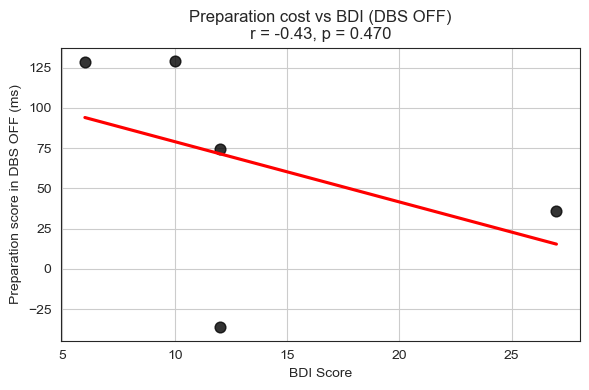

In [99]:
df_on = df_merged_subs[df_merged_subs['DBS'] == 'OFF']

model_on = smf.mixedlm(
    "Q('preparation cost (ms)') ~ BDI_c",  # only BDI score as fixed effect
    data=df_on,
    groups="Subject"            # random intercept per subject
)
result_on = model_on.fit()
print(result_on.summary())

# Extract variables
x = df_on['BDI']
y = df_on['preparation cost (ms)']

# Calculate Pearson correlation
r, p_val = scipy.stats.pearsonr(x, y)

# Fit linear regression manually to get slope and intercept
slope, intercept = np.polyfit(x, y, 1)

# Plot
plt.figure(figsize=(6, 4))
sns.regplot(x=x, y=y, ci=None, scatter_kws={'s': 60, 'color': 'black'}, line_kws={'color': 'red'})

# Set title with r and regression equation
plt.title(f'Preparation cost vs BDI (DBS OFF)\n'
          f'r = {r:.2f}, p = {p_val:.3f}')

plt.xlabel('BDI Score')
plt.ylabel('Preparation score in DBS OFF (ms)')
plt.grid(True)
plt.tight_layout()
plt.show()

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Q('SSRT (ms)')
No. Observations: 5       Method:             REML          
No. Groups:       5       Scale:              1727.2145     
Min. group size:  1       Log-Likelihood:     -19.7634      
Max. group size:  1       Converged:          Yes           
Mean group size:  1.0                                       
------------------------------------------------------------
               Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept      299.571    6.363 47.081 0.000 287.100 312.042
BIS_c            8.132    4.772  1.704 0.088  -1.222  17.485
Subject Var   1727.214                                      



c:\Users\Juliette\anaconda3\envs\excel_analysis\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


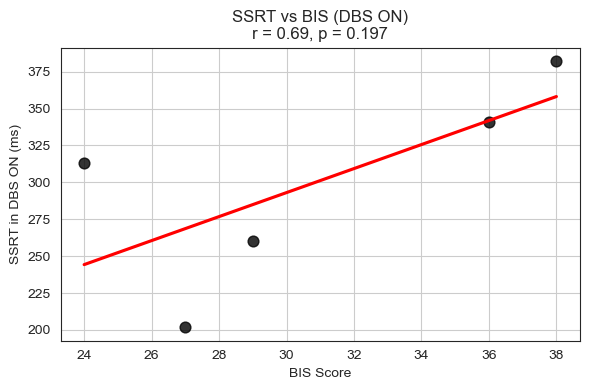

In [93]:
df_on = df_merged_subs[df_merged_subs['DBS'] == 'ON']

model_on = smf.mixedlm(
    "Q('SSRT (ms)') ~ BIS_c",  # only BIS score as fixed effect
    data=df_on,
    groups="Subject"            # random intercept per subject
)
result_on = model_on.fit()
print(result_on.summary())

# Extract variables
x = df_on['BIS']
y = df_on['SSRT (ms)']

# Calculate Pearson correlation
r, p_val = scipy.stats.pearsonr(x, y)

# Fit linear regression manually to get slope and intercept
slope, intercept = np.polyfit(x, y, 1)

# Plot
plt.figure(figsize=(6, 4))
sns.regplot(x=x, y=y, ci=None, scatter_kws={'s': 60, 'color': 'black'}, line_kws={'color': 'red'})

# Set title with r and regression equation
plt.title(f'SSRT vs BIS (DBS ON)\n'
          f'r = {r:.2f}, p = {p_val:.3f}')

plt.xlabel('BIS Score')
plt.ylabel('SSRT in DBS ON (ms)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Make sure DBS and Session are treated as categorical variables
df_merged_subs['DBS'] = df_merged_subs['DBS'].astype('category')
df_merged_subs['Session'] = df_merged_subs['Session'].astype('category')

# Fit the model
model = smf.mixedlm(
    formula="Q('preparation cost (ms)') ~ DBS + Session",  # fixed effects
    data=df_merged_subs,
    groups="Subject"  # random intercept per subject
)
result = model.fit()

# Print the summary
print(result.summary())


                 Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Q('preparation cost (ms)')
No. Observations: 10      Method:             REML                      
No. Groups:       5       Scale:              631.6358                  
Min. group size:  2       Log-Likelihood:     -39.5197                  
Max. group size:  2       Converged:          Yes                       
Mean group size:  2.0                                                   
--------------------------------------------------------------------------
                    Coef.     Std.Err.     z     P>|z|    [0.025    0.975]
--------------------------------------------------------------------------
Intercept            45.596     29.387   1.552   0.121   -12.003   103.194
DBS[T.ON]             4.166     16.223   0.257   0.797   -27.630    35.963
Session[T.2]         51.740     16.223   3.189   0.001    19.943    83.536
Subject Var        3475.927    162.959                   

Term	        Coef.   	p-value 	Interpretation

Intercept	    45.60	    0.121	    Baseline prep cost (DBS=OFF, Session=1) — not significantly different from 0.

DBS[T.ON]	    4.17	    0.797	    DBS ON increases prep cost by ~4.2 ms vs OFF — not significant.

Session[T.2]	51.74   	0.001	    Session 2 increases prep cost by ~52 ms vs Session 1 — statistically significant.


✅ Only Session has a significant effect on the preparation cost.

Preparation cost is higher in the second session, regardless of DBS status.

DBS has a negligible and non-significant effect.

In [68]:
# Fit the model
model = smf.mixedlm(
    formula="Q('SSRT (ms)') ~ DBS + Session",  # fixed effects
    data=df_merged_subs,
    groups="Subject"  # random intercept per subject
)
result = model.fit()

# Print the summary
print(result.summary())

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Q('SSRT (ms)')
No. Observations: 10      Method:             REML          
No. Groups:       5       Scale:              3266.5659     
Min. group size:  2       Log-Likelihood:     -43.0799      
Max. group size:  2       Converged:          Yes           
Mean group size:  2.0                                       
------------------------------------------------------------
               Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept      306.933   43.079  7.125 0.000 222.499 391.367
DBS[T.ON]      -16.094   36.893 -0.436 0.663 -88.402  56.215
Session[T.2]    14.553   36.893  0.394 0.693 -57.755  86.862
Subject Var   4923.723  123.918                             



ChatGPT: We fitted a linear mixed model with SSRT as the dependent variable, DBS and Session as fixed effects, and Subject as a random effect. Neither DBS (p = 0.66) nor Session (p = 0.69) significantly affected SSRT. However, subject-level variance was high, suggesting large individual differences in SSRT performance.

In [73]:
# Fit the model
model = smf.mixedlm(
    formula="Q('mean SSD (ms)') ~ DBS + Session",  # fixed effects
    data=df_merged_subs,
    groups="Subject"  # random intercept per subject
)
result = model.fit()

# Print the summary
print(result.summary())

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Q('mean SSD (ms)')
No. Observations: 10      Method:             REML              
No. Groups:       5       Scale:              3454.0981         
Min. group size:  2       Log-Likelihood:     -44.2866          
Max. group size:  2       Converged:          Yes               
Mean group size:  2.0                                           
-----------------------------------------------------------------
               Coef.    Std.Err.    z     P>|z|   [0.025   0.975]
-----------------------------------------------------------------
Intercept      342.153    53.619   6.381  0.000  237.062  447.243
DBS[T.ON]       32.118    37.937   0.847  0.397  -42.237  106.473
Session[T.2]    -3.090    37.937  -0.081  0.935  -77.445   71.265
Subject Var   9769.337   211.284                                 



Pearson's r = -0.509, p = 0.063


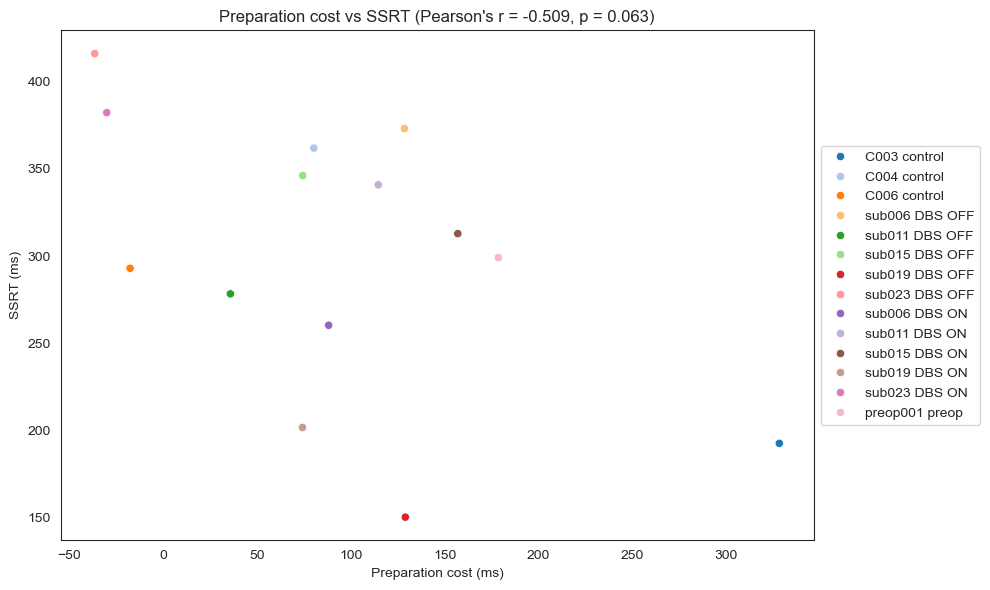

In [23]:
plotting.plot_corr_prep_cost_SSRT(df_merged, behav_results_saving_path, show_fig=True)

# 8. Correlation SSD and SSRT in reactive inhibition? #

Pearson's r = -0.773, p = 0.001


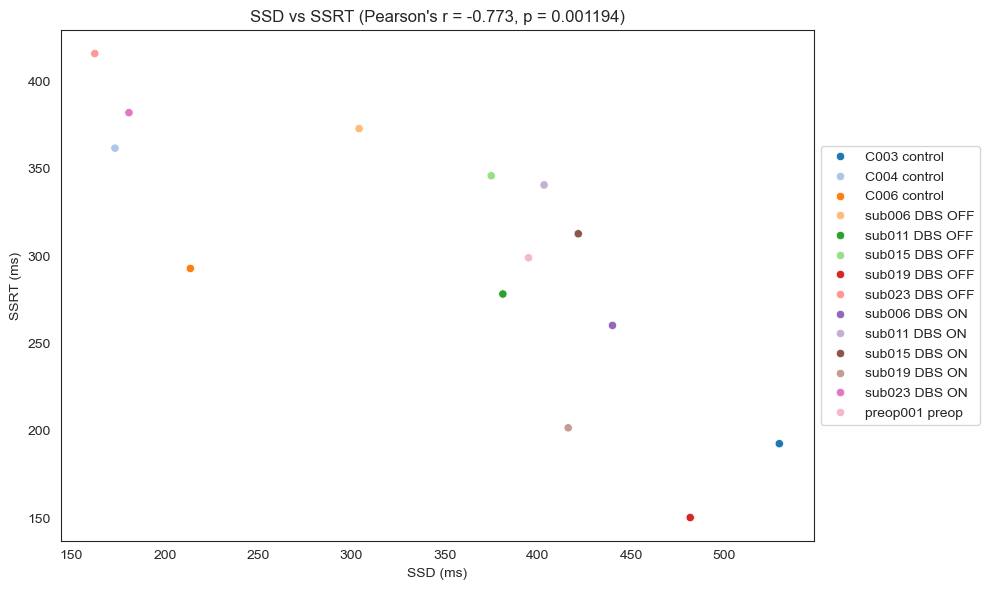

In [24]:
plotting.plot_corr_SSD_SSRT(df_merged, behav_results_saving_path, show_fig=True)

# 9. Effect of STN-DBS on Success Rate #

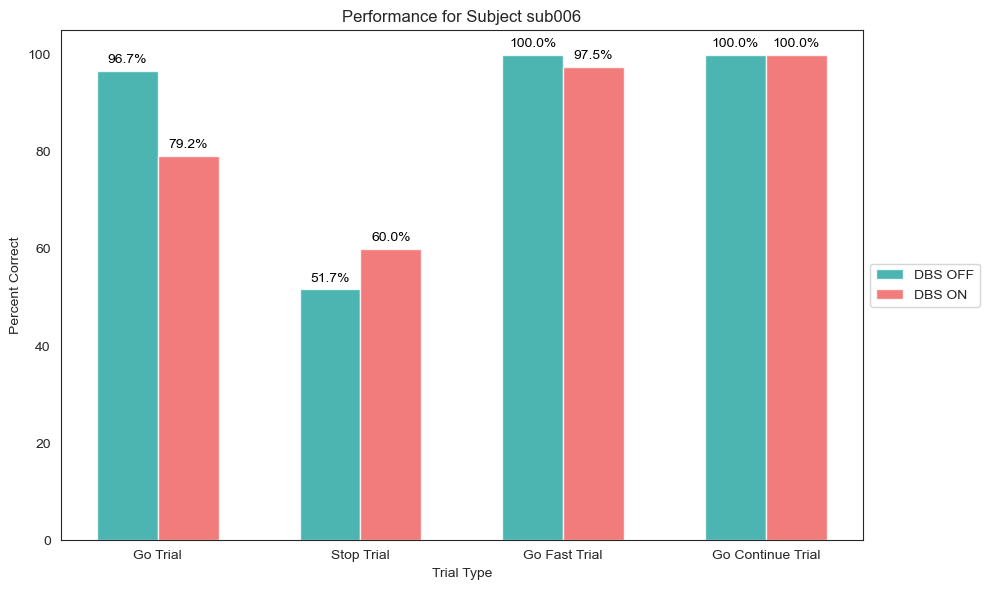

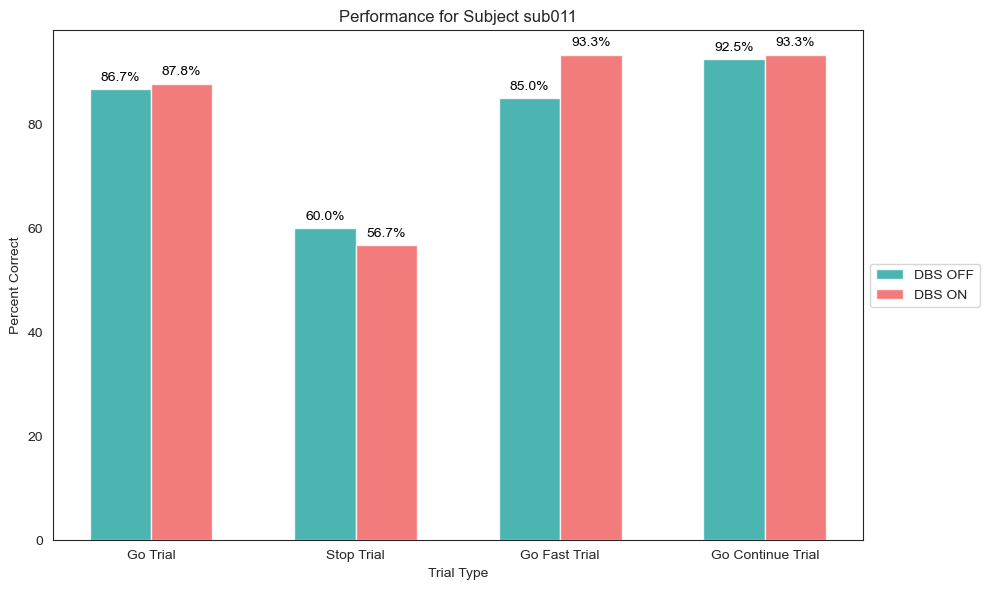

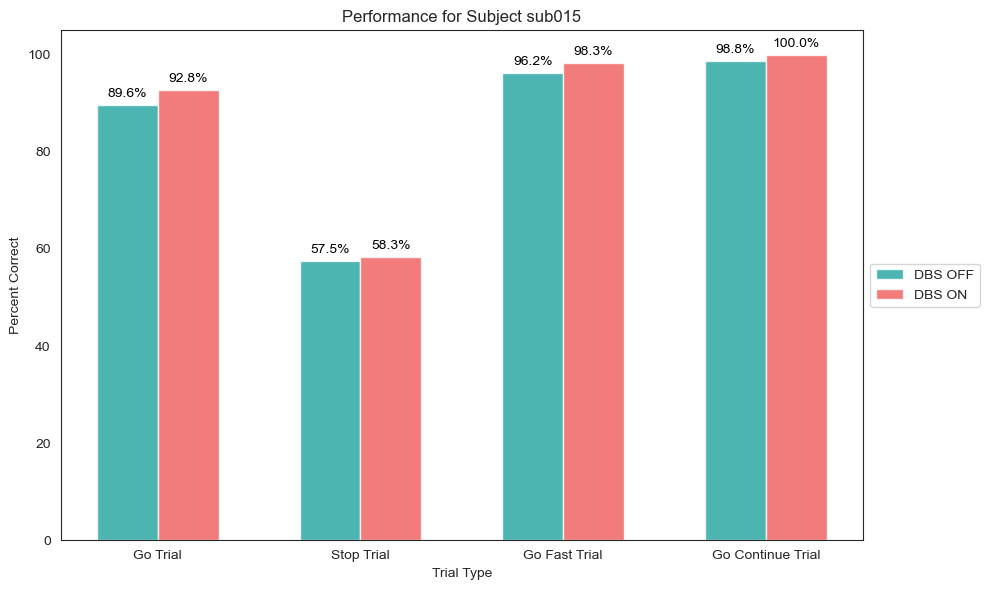

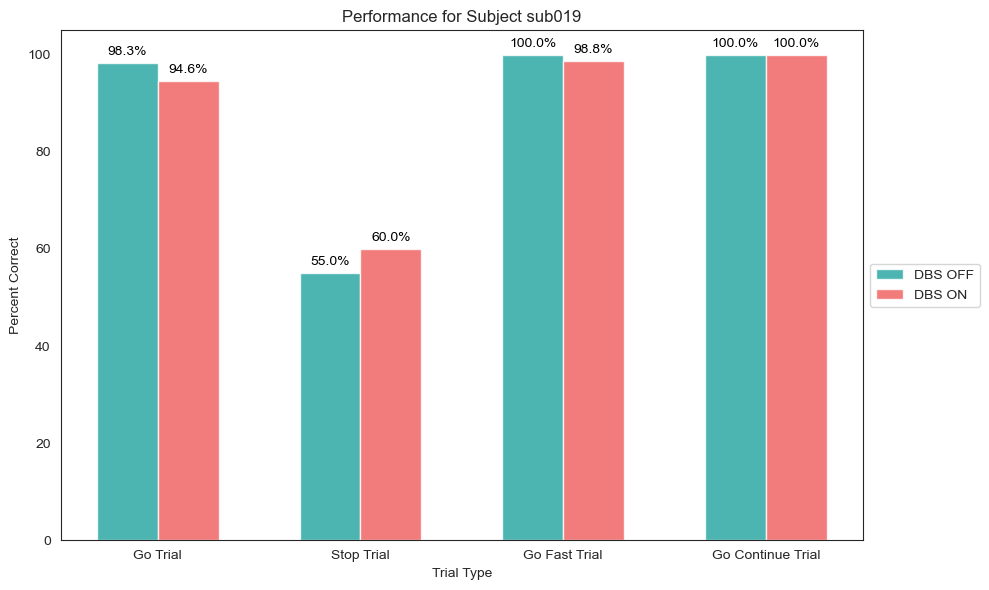

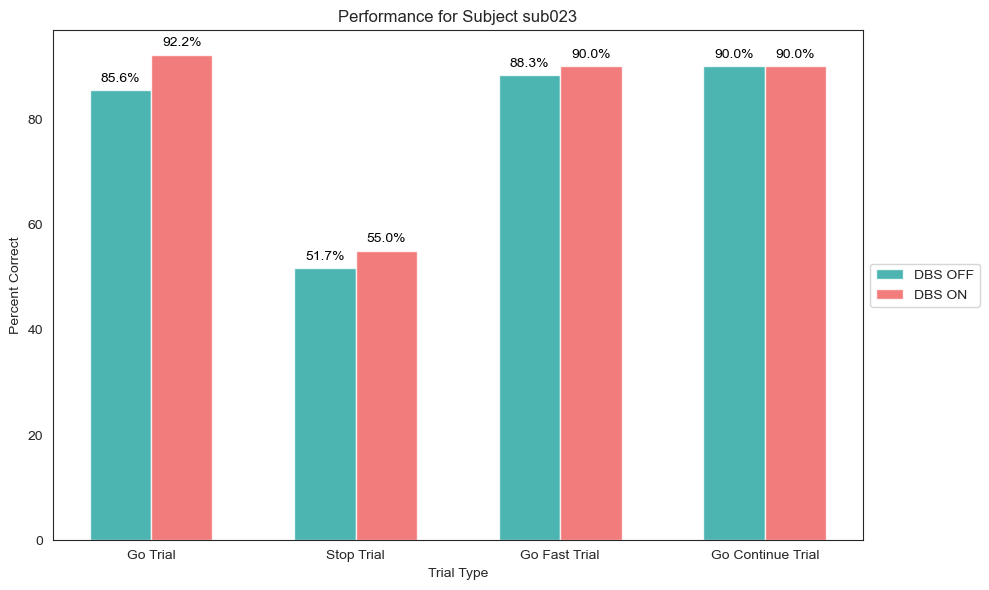

In [25]:
plotting.plot_dbs_effect_success_rate_single_sub(
        stats_OFF,
        stats_ON,
        behav_results_saving_path,
        show_fig=True
)

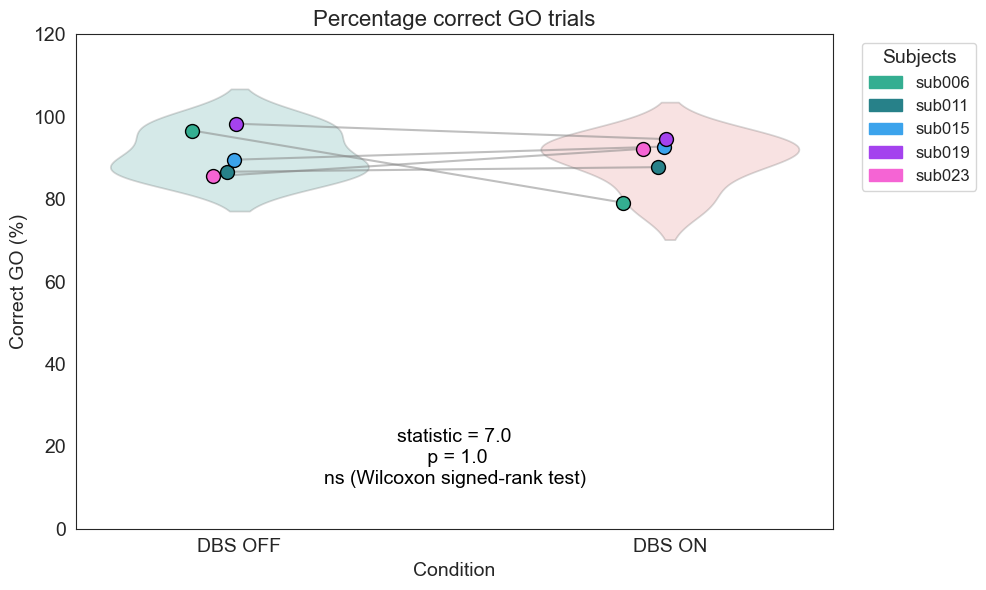

c:\Users\Juliette\anaconda3\envs\excel_analysis\lib\site-packages\scipy\stats\_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


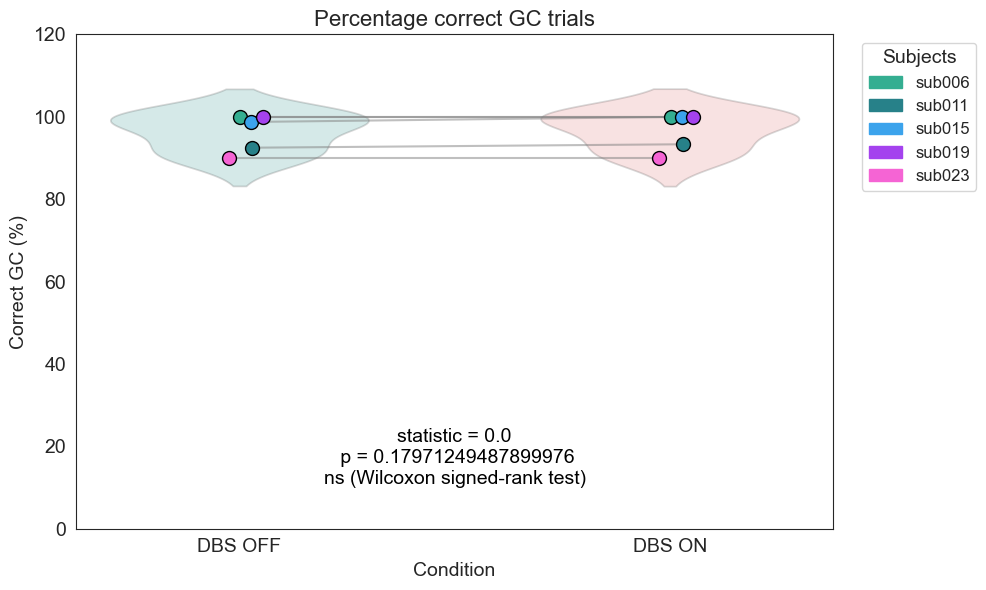

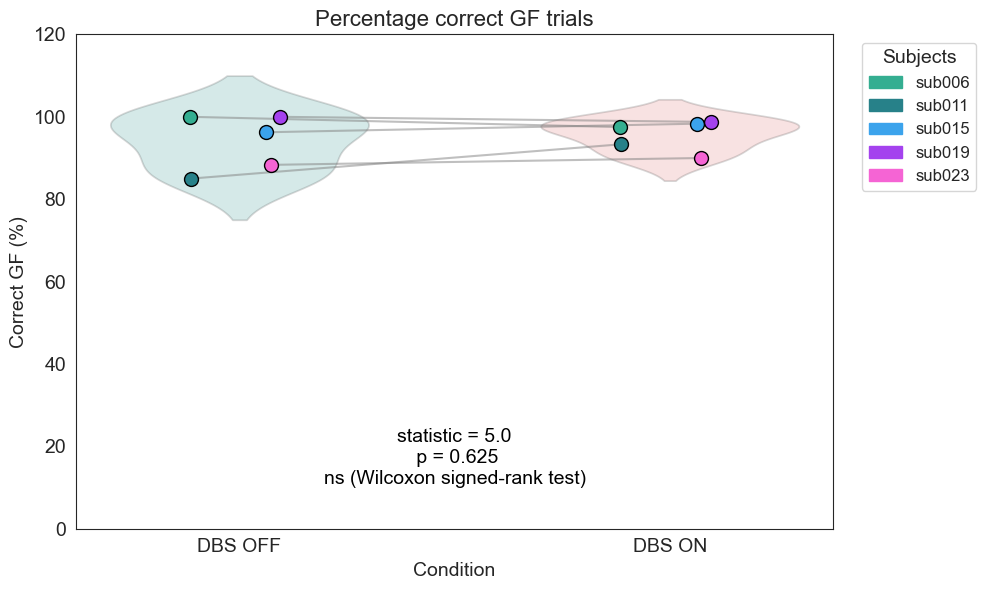

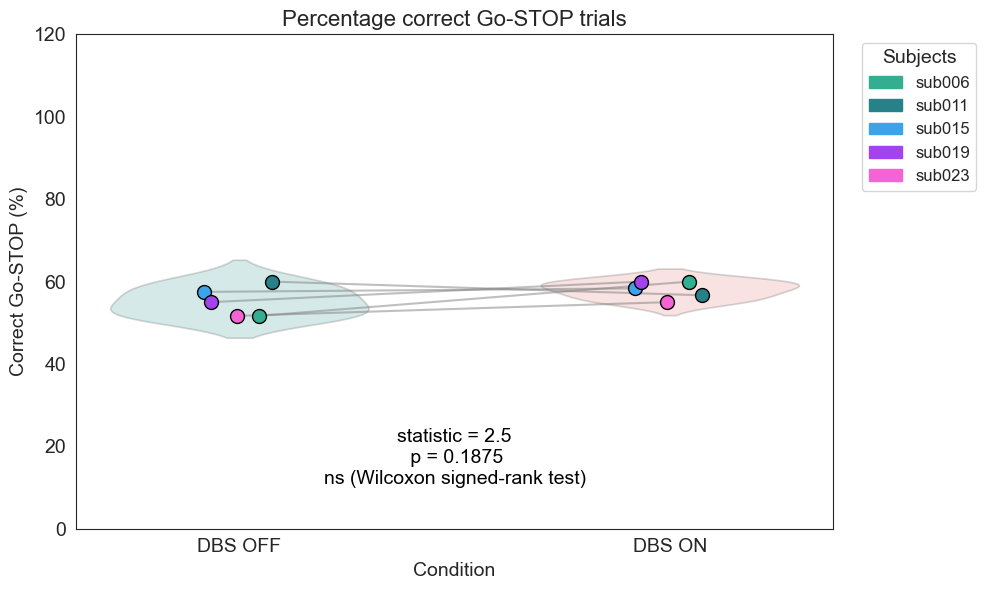

In [26]:
trial_type = ['GO', 'GC', 'GF', 'Go-STOP']
for trial in trial_type:
    plotting.plot_percent_success_on_vs_off(
            stats_OFF=stats_OFF,
            stats_ON=stats_ON,
            trial_type=trial,
            subject_colors=subject_colors,
            behav_results_saving_path=behav_results_saving_path,
                show_fig=True
    )

In [27]:
stats_dbs = {}
subject_ids = [key.split(' ')[0] for key in stats_OFF.keys() if 'OFF' in key]

for sub in subject_ids: 
    stats_dbs[sub] = {
        'OFF': stats_OFF[f'{sub} DBS OFF mSST'],
        'ON': stats_ON[f'{sub} DBS ON mSST'],
    }

{'OFF': {'go_trial': 180, 'total_trials': 359, 'go_continue_trial': 59, 'go_fast_trial': 60, 'stop_trial': 60, 'percent correct go_trial': 96.66666666666667, 'correct go_trial': 174, 'incorrect early go_trial': 1, 'incorrect wrong go_trial': 5, 'total correct trials': 324, 'percent correct go_continue_trial': 100.0, 'correct go_continue_trial': 59, 'incorrect early go_continue_trial': 0, 'incorrect wrong go_continue_trial': 0, 'percent correct go_fast_trial': 100.0, 'correct go_fast_trial': 60, 'incorrect early go_fast_trial': 0, 'incorrect wrong go_fast_trial': 0, 'percent correct stop_trial': 51.66666666666667, 'correct stop_trial': 31, 'incorrect early stop_trial': 0, 'incorrect wrong stop_trial': 29, 'early presses': 1, 'go_trial RTs (ms)': [421.941099979449, 592.6407999941148, 550.8866999880411, 623.9630999916699, 684.5167000137735, 458.0271000158973, 597.4382999993395, 493.5236000164877, 440.5687999969814, 708.8661000016145, 743.8620000029914, 587.8819999925327, 464.7487999754958

C:\Users\Juliette\AppData\Local\Temp\ipykernel_28956\1431990724.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  success_df = success_df.append({
C:\Users\Juliette\AppData\Local\Temp\ipykernel_28956\1431990724.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  success_df = success_df.append({
C:\Users\Juliette\AppData\Local\Temp\ipykernel_28956\1431990724.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  success_df = success_df.append({
C:\Users\Juliette\AppData\Local\Temp\ipykernel_28956\1431990724.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  success_df = success_df.append({
C:\Users\Juliette\AppData\Local\Temp\ipykern

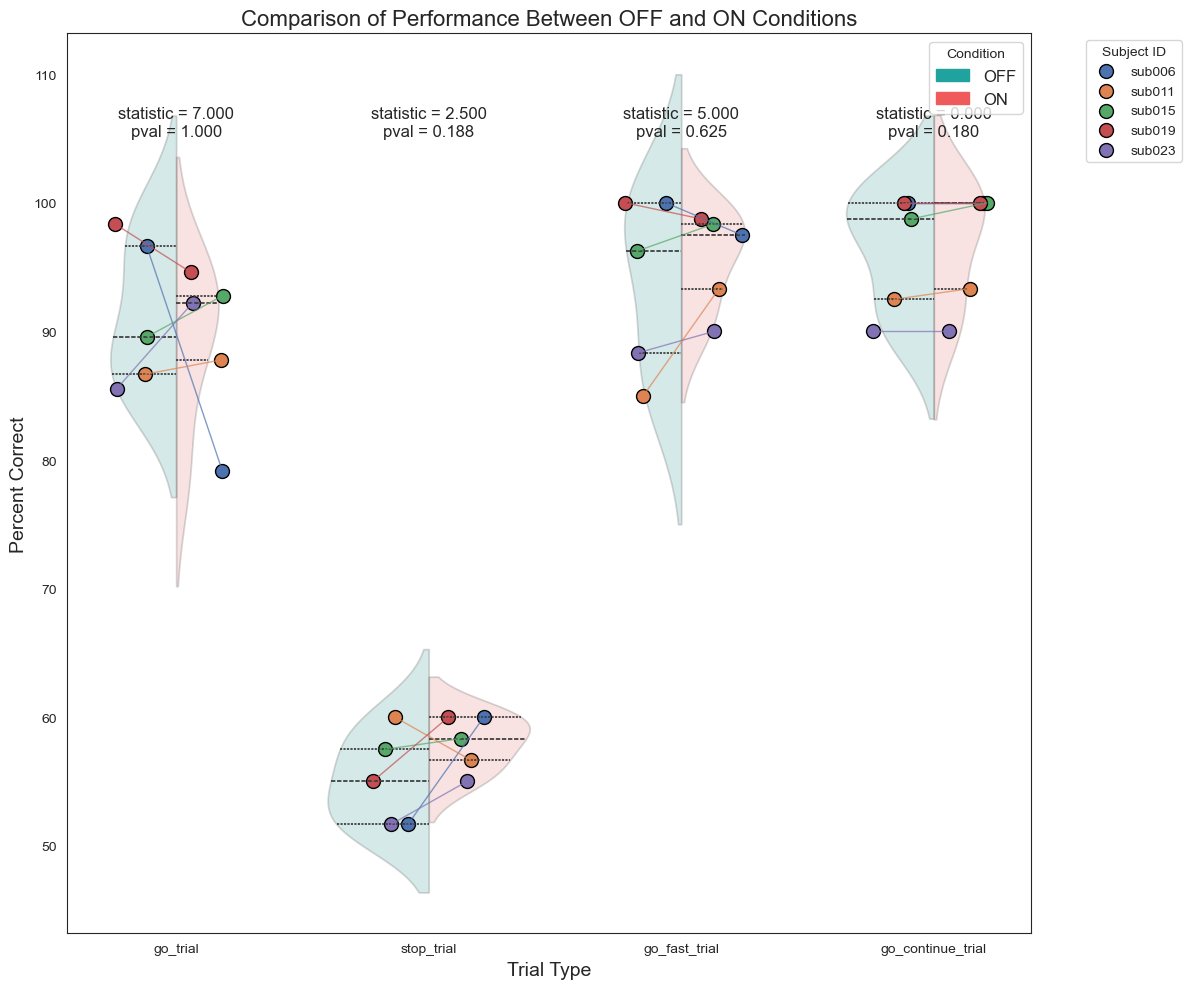

In [28]:
# Prepare the data in a long format suitable for seaborn's violin plot
plot_data = []

# Define trial types and bar width
trial_types = ['go_trial', 'stop_trial', 'go_fast_trial', 'go_continue_trial']
bar_width = 0.3
index = np.arange(len(trial_types))
opacity = 0.8

# Create an empty dataframe to store success rates for each participant
columns = ['subject_id', 'trial_type', 'off_percent', 'on_percent']
success_df = pd.DataFrame(columns=columns)

# Access data for a single subject in OFF and ON conditions
for subject_id in stats_dbs.keys():
    stats_dbs_new = {
        'OFF': stats_dbs[subject_id]['OFF'],
        'ON': stats_dbs[subject_id]['ON']
    }
    print(stats_dbs_new)

    # Retrieve values for each trial type in both conditions
    off_values = [
        stats_dbs_new['OFF']['percent correct go_trial'],
        stats_dbs_new['OFF']['percent correct stop_trial'],
        stats_dbs_new['OFF']['percent correct go_fast_trial'],
        stats_dbs_new['OFF']['percent correct go_continue_trial']
    ]

    on_values = [
        stats_dbs_new['ON']['percent correct go_trial'],
        stats_dbs_new['ON']['percent correct stop_trial'],
        stats_dbs_new['ON']['percent correct go_fast_trial'],
        stats_dbs_new['ON']['percent correct go_continue_trial']
    ]

    # Add the subject data to the dataframe
    for i, trial_type in enumerate(trial_types):
        success_df = success_df.append({
            'subject_id': subject_id,
            'trial_type': trial_type,
            'off_percent': off_values[i],
            'on_percent': on_values[i]
        }, ignore_index=True)

for trial_type in trial_types:
    trial_data = success_df[success_df['trial_type'] == trial_type]

    # Add data for OFF and ON conditions in the long format
    trial_data_off = trial_data[['subject_id', 'off_percent']].rename(columns={'off_percent': 'percent_correct'})
    trial_data_off['condition'] = 'OFF'
    
    trial_data_on = trial_data[['subject_id', 'on_percent']].rename(columns={'on_percent': 'percent_correct'})
    trial_data_on['condition'] = 'ON'
    
    # Combine both conditions into one DataFrame
    trial_data_combined = pd.concat([trial_data_off, trial_data_on])

    # Add trial type information for plotting
    trial_data_combined['trial_type'] = trial_type
    
    plot_data.append(trial_data_combined)

# Combine all trial data into one dataframe
plot_data = pd.concat(plot_data)

# Set up the plot
plt.figure(figsize=(12, 10))

# Create a violin plot for each trial type
sns.violinplot(x='trial_type', y='percent_correct', hue='condition', data=plot_data, split=True, 
               palette={'OFF': '#20a39e', 'ON': '#ef5b5b'}, alpha = 0.2, inner='quart', linewidth=1.25)

# Initialize lists for legend handles and labels
handles = []
labels = []

# Add colored dots for each participant
for i, trial_type in enumerate(trial_types):
    trial_data_for_dots = plot_data[plot_data['trial_type'] == trial_type]
    
    # Create a color map for each participant
    subject_colors = {subject: sns.color_palette("deep", len(trial_data_for_dots['subject_id'].unique()))[i] 
                      for i, subject in enumerate(trial_data_for_dots['subject_id'].unique())}

    for subject_id, color in subject_colors.items():
        subject_data = trial_data_for_dots[trial_data_for_dots['subject_id'] == subject_id]
        
        # Extract OFF and ON data points
        off_value = subject_data[subject_data['condition'] == 'OFF']['percent_correct'].values
        on_value = subject_data[subject_data['condition'] == 'ON']['percent_correct'].values
        
        # Offset x positions for visual clarity
        j = np.random.uniform(-0.1, 0.1)  # Random offset for each subject
        x_pos = [i - 0.15 + j, i + 0.15 + j]
        
        # Scatter plot for each participant's result
        scatter = plt.scatter(x_pos, [off_value, on_value], color=color, edgecolors='black', s=100)
        
        # **NEW: Add line connecting OFF and ON dots for each subject**
        plt.plot(x_pos, [off_value, on_value], color=color, alpha=0.7, linestyle='-', linewidth=1)

        # Add to the legend (only add each subject once)
        if subject_id not in labels:
            handles.append(scatter)
            labels.append(subject_id)

# Add t-test results to each subplot
for i, trial_type in enumerate(trial_types):
    trial_data_for_ttest = plot_data[plot_data['trial_type'] == trial_type]
    # t_stat, p_value = scipy.stats.ttest_rel(
    #     trial_data_for_ttest[trial_data_for_ttest['condition'] == 'OFF']['percent_correct'],
    #     trial_data_for_ttest[trial_data_for_ttest[ 'condition'] == 'ON']['percent_correct']
    # )
    test_result, p_value = scipy.stats.wilcoxon(
        trial_data_for_ttest[trial_data_for_ttest['condition'] == 'OFF']['percent_correct'],
        trial_data_for_ttest[trial_data_for_ttest[ 'condition'] == 'ON']['percent_correct']
        )
    
    plt.text(i, 105, f"statistic = {test_result:.3f}\npval = {p_value:.3f}", 
             horizontalalignment='center', fontsize=12, verticalalignment='bottom')

# Set labels and title
plt.xlabel('Trial Type', fontsize=14)
plt.ylabel('Percent Correct', fontsize=14)
plt.title('Comparison of Performance Between OFF and ON Conditions', fontsize=16)

# Custom legend for OFF and ON condition colors
from matplotlib.patches import Patch
condition_legend_handles = [
    Patch(color='#20a39e', label='OFF'),
    Patch(color='#ef5b5b', label='ON')
]

# Create two legends: one for OFF/ON conditions, one for subjects
legend1 = plt.legend(handles=condition_legend_handles, title="Condition", loc='upper right', fontsize=12)
plt.gca().add_artist(legend1)  # Ensure the first legend stays

# Second legend for subject IDs
plt.legend(handles=handles, labels=labels, title="Subject ID", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


# 10. Effect of DBS on Reaction Time #

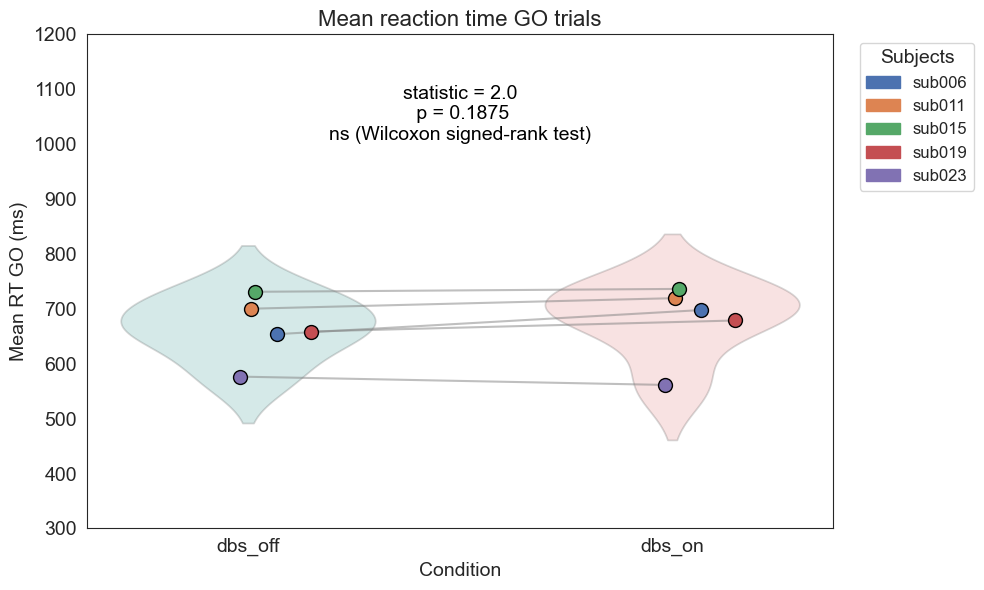

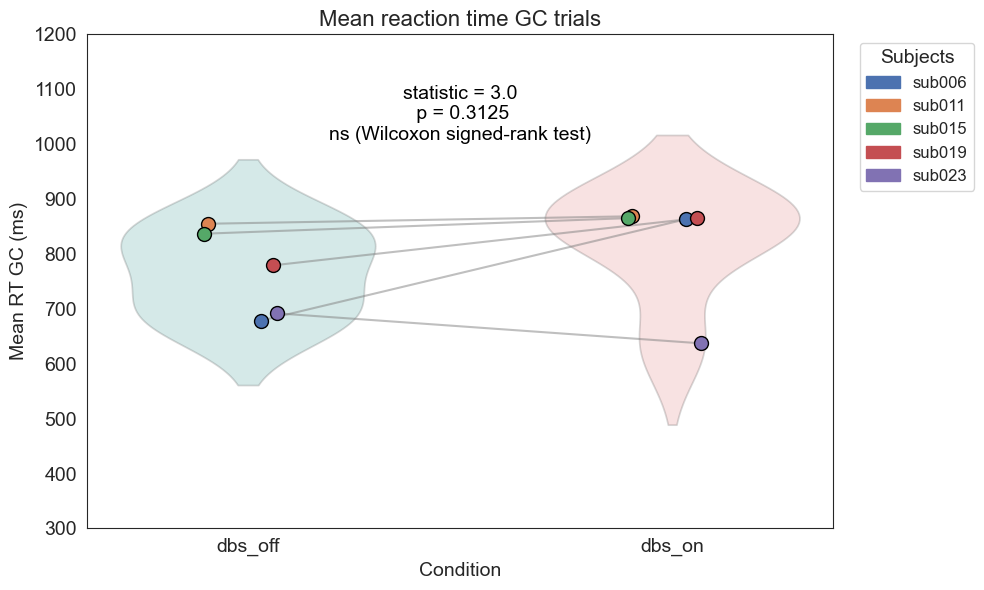

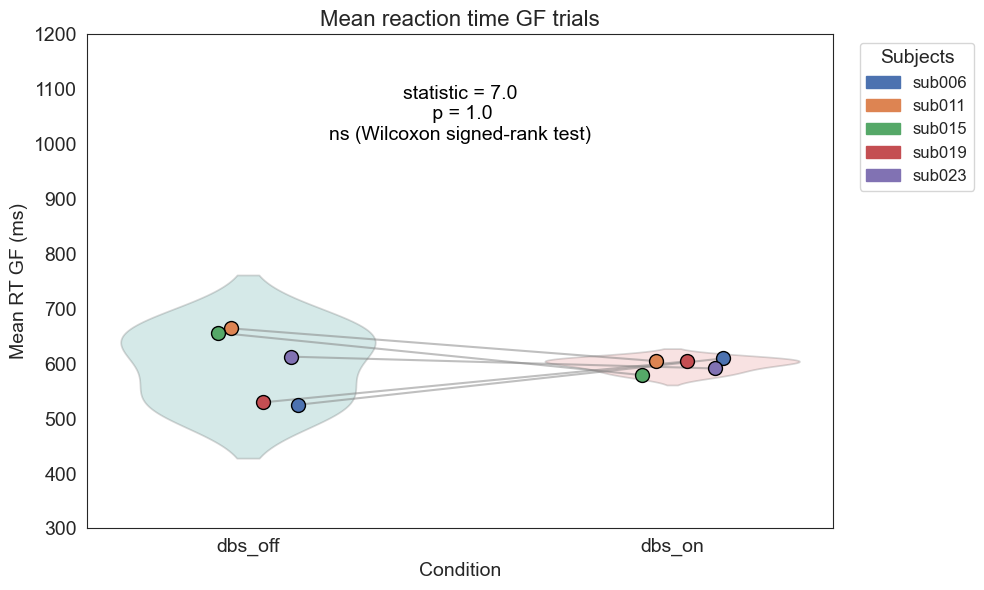

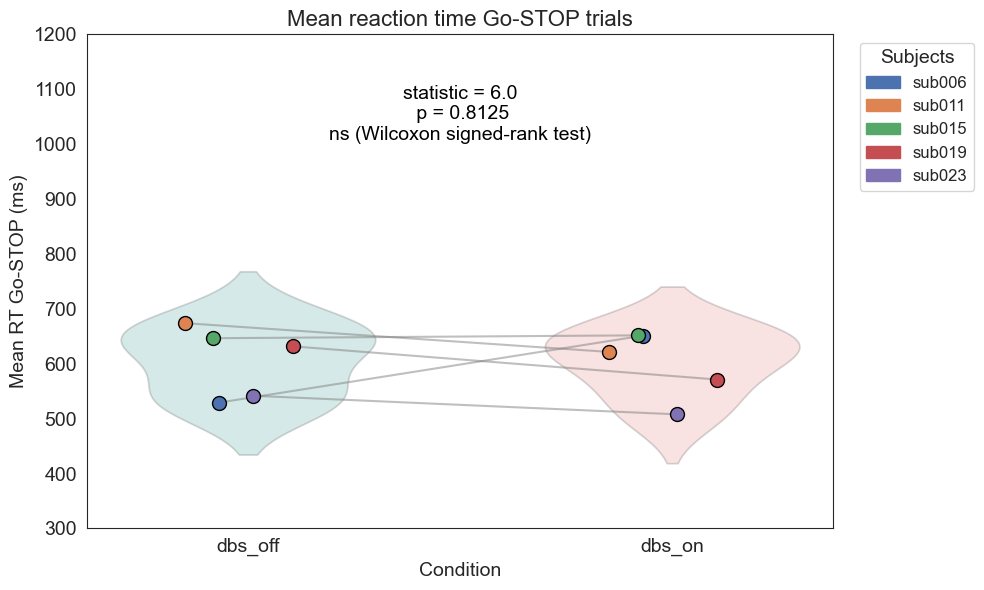

In [29]:
trial_type = ['GO', 'GC', 'GF', 'Go-STOP']
for trial in trial_type:
    plotting.plot_reaction_time_on_vs_off(
            stats_OFF=stats_OFF,
            stats_ON=stats_ON,
            trial_type=trial,
            subject_colors=subject_colors,
            behav_results_saving_path=behav_results_saving_path,
        show_fig=True
    )

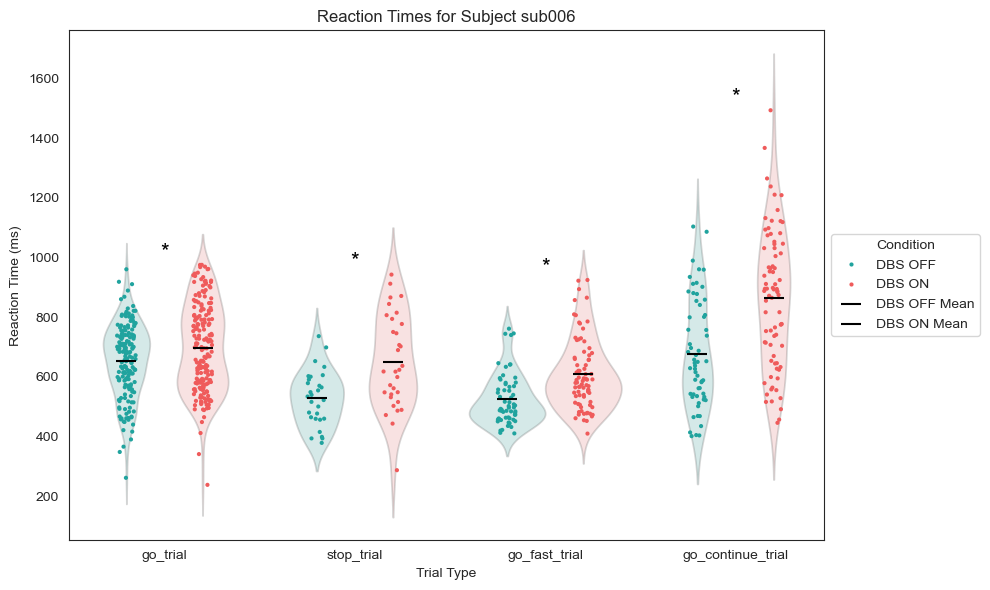

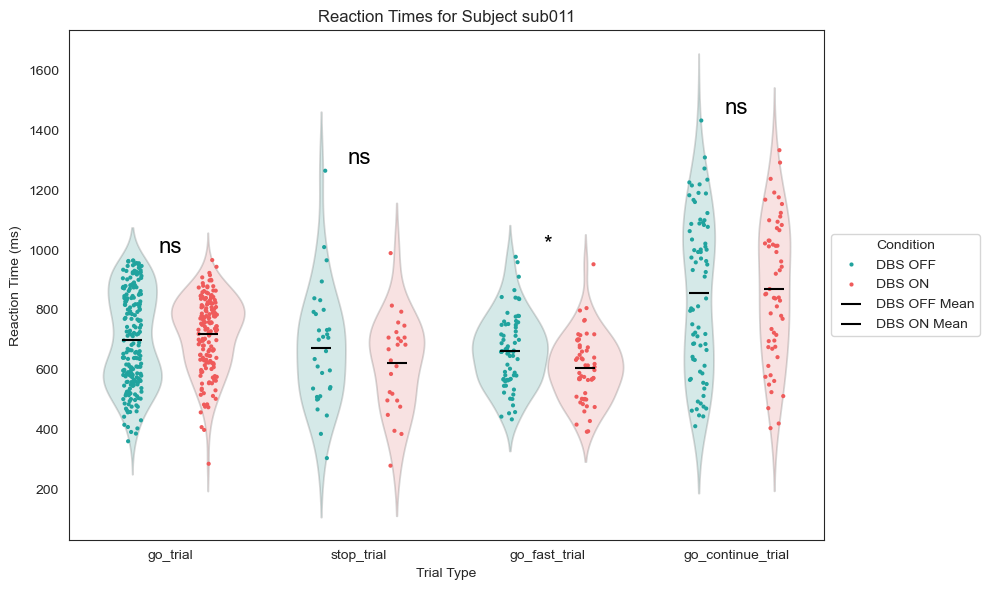

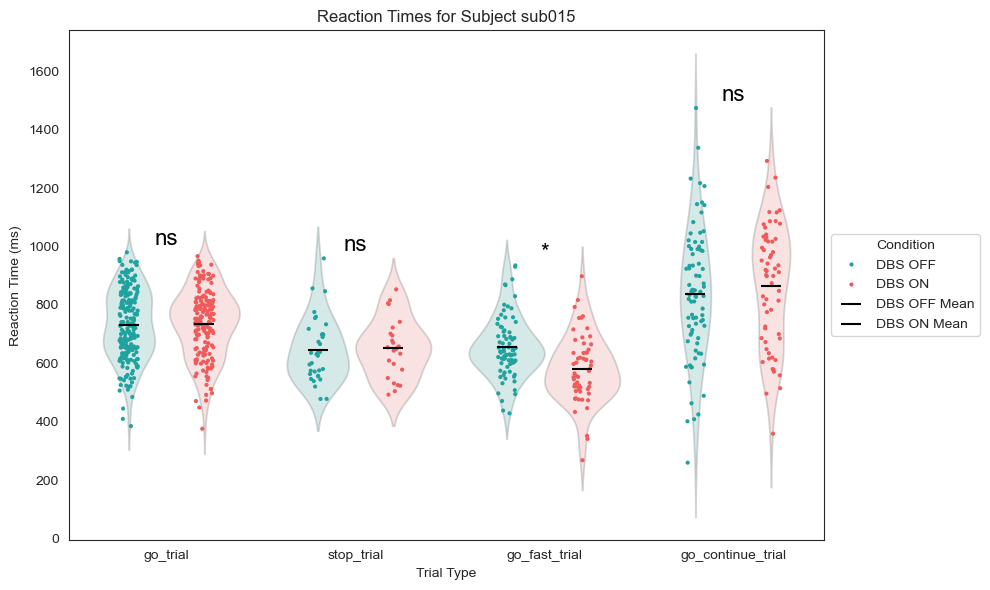

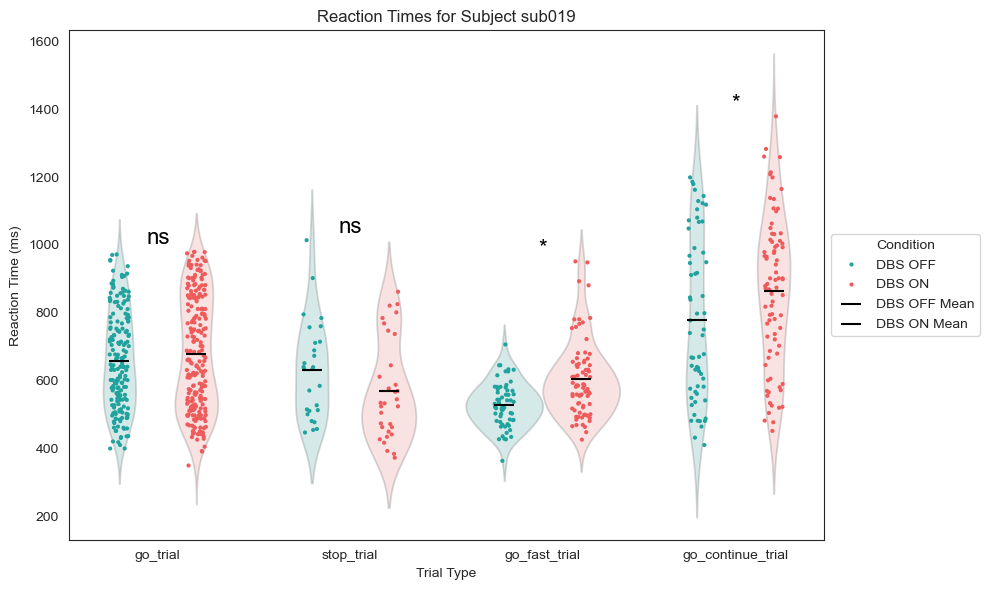

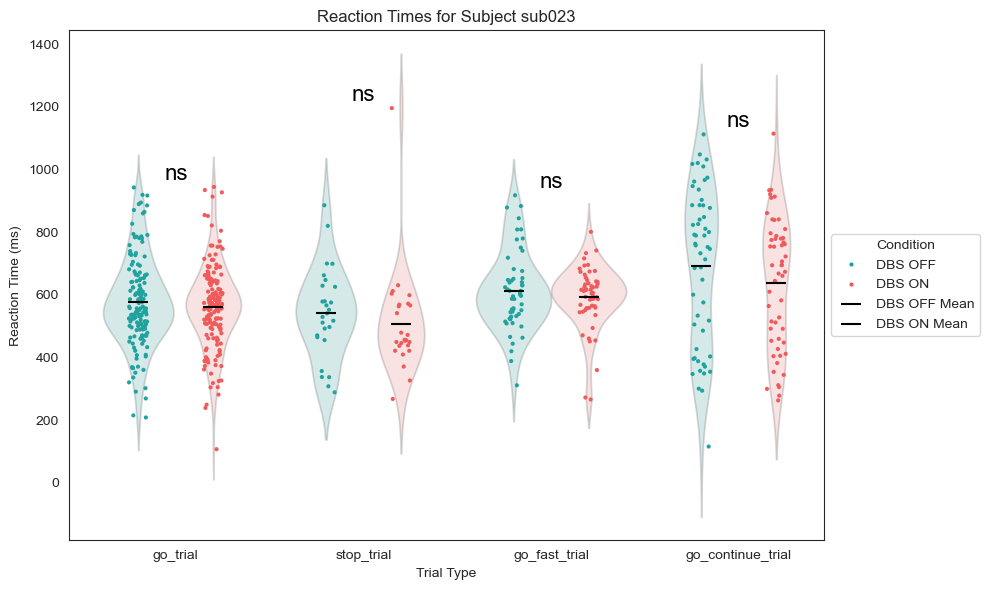

In [30]:
plotting.plot_dbs_effect_reaction_time_single_sub(
        stats_OFF,
        stats_ON,
        behav_results_saving_path,
        show_fig=True
)

Trial Type: go_trial, t-statistic: -1.514, p-value: 0.205, Correlation Coefficient: 0.956


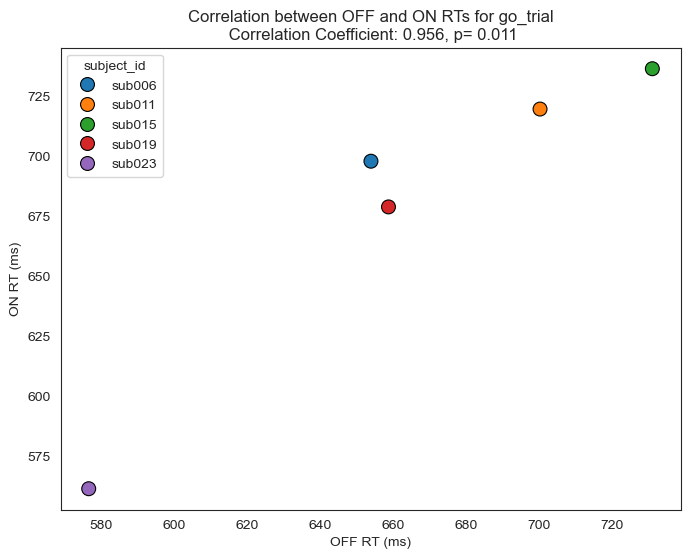

Trial Type: stop_trial, t-statistic: 0.117, p-value: 0.913, Correlation Coefficient: 0.302


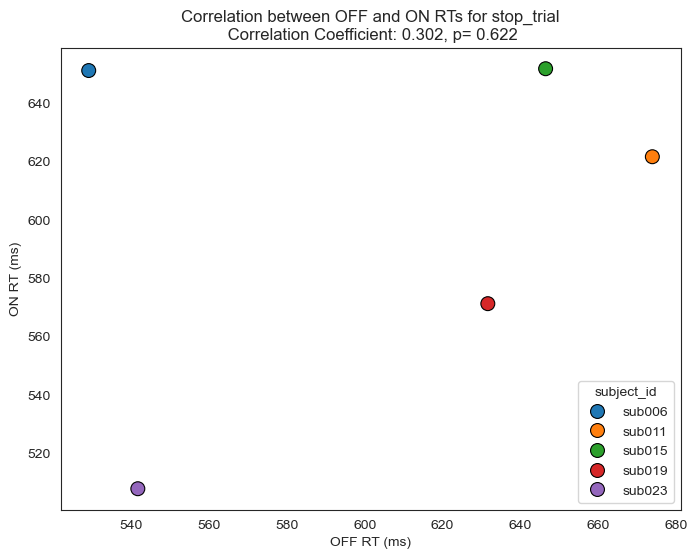

Trial Type: go_fast_trial, t-statistic: -0.005, p-value: 0.996, Correlation Coefficient: -0.607


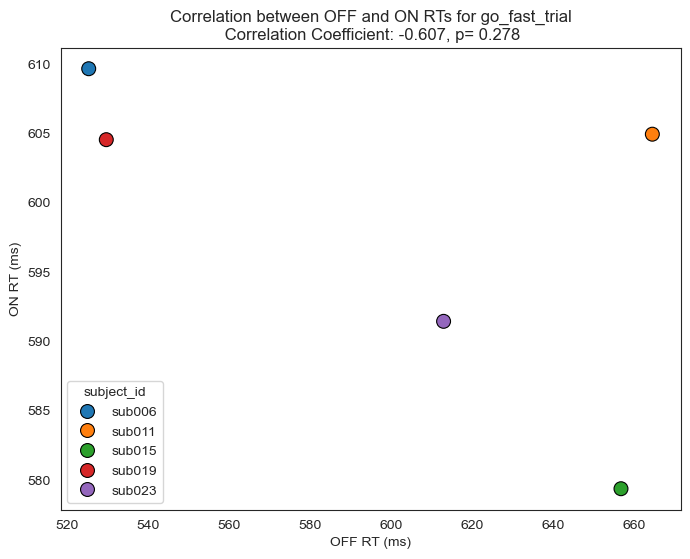

Trial Type: go_continue_trial, t-statistic: -1.287, p-value: 0.268, Correlation Coefficient: 0.542


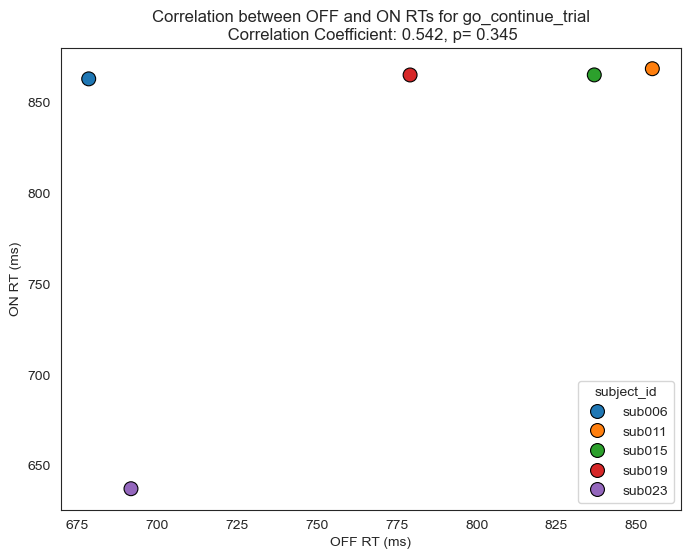

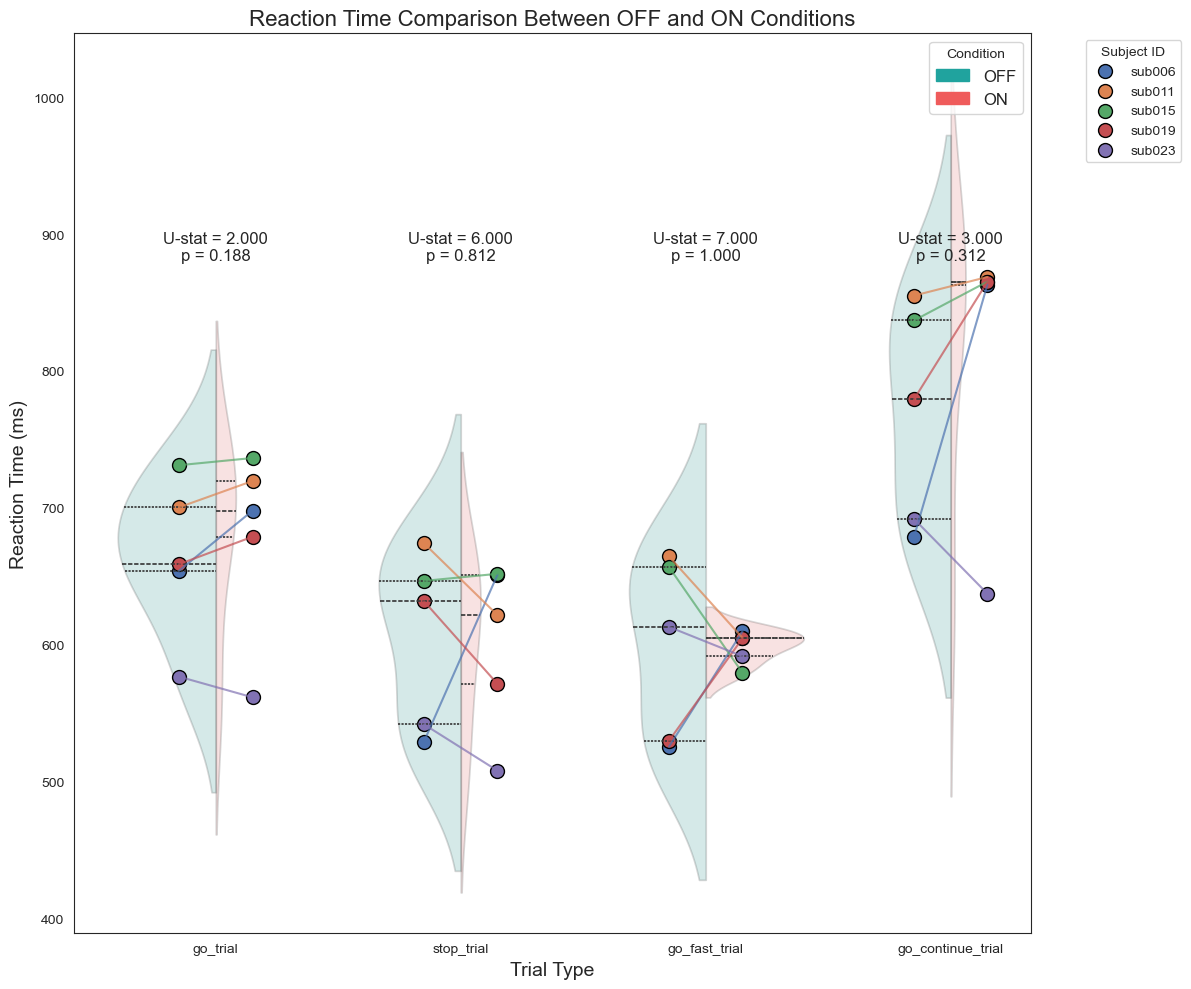

In [31]:
plotting.plot_dbs_effect_on_rt_all_sub_with_2_sessions_all_trial_types(
        stats_OFF,
        stats_ON,
        subject_colors,
        behav_results_saving_path,
        show_fig=True
)

# 7. Test if RT during GO trials correlates with SSRT # (should not!)

In [ ]:
plotting.plot_corr_gort_ssrt(
    stats,    
    behav_results_saving_path,
    show_fig=True
)

In [ ]:
plotting.plot_early_press_on_vs_off(
        stats_OFF,
        stats_ON,
        subject_colors,
        behav_results_saving_path,
        show_fig=True
)

c:\Users\Juliette\anaconda3\envs\excel_analysis\lib\site-packages\scipy\stats\_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


Mean and standard deviation for each condition:
           mean       std
Condition                
dbs_off     1.8  2.949576
dbs_on      2.2  3.033150
